## Step 1: Extract BC / AD-BCs from fastq files (old) done in ciberseq experiments script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import scipy
import string
from scipy.stats import spearmanr, pearsonr
import numpy as np

In [4]:
ADcsv_directory = os.path.join(os.getcwd(), 'analyzed_dfs/AD')
ADexperiments_dict = {}

# Iterate over files in the directory
for filename in os.listdir(ADcsv_directory):
#     print(filename)
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(ADcsv_directory, filename)):
        # Assuming all files are CSV, adjust the condition as needed
        if filename.endswith('.csv'):
            # Read the file into a DataFrame
            df = pd.read_csv(os.path.join(ADcsv_directory, filename), index_col=0)
            # Get the value in column x of row 1
            key_value = '_'.join(df.iloc[0]['Library'].split('_')[:3])
            df['Library'] = key_value
            # Store the DataFrame in the dictionary with the key as the value in column x of row 1
            ADexperiments_dict[key_value] = df
#             print(key_value)

            
RPTRcsv_directory = os.path.join(os.getcwd(), 'analyzed_dfs/RPTR')
RPTRexperiments_dict = {}
            
for filename in os.listdir(RPTRcsv_directory):
#     print(filename)
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(RPTRcsv_directory, filename)):
        # Assuming all files are CSV, adjust the condition as needed
        if filename.endswith('.csv'):
            # Read the file into a DataFrame
            df = pd.read_csv(os.path.join(RPTRcsv_directory, filename), index_col=0)
            # Get the value in column x of row 1
            key_value = '_'.join(df.iloc[0]['Library'].split('_')[:3])
            df['Library'] = key_value
            # Store the DataFrame in the dictionary with the key as the value in column x of row 1
            RPTRexperiments_dict[key_value] = df
#             print(key_value)
            
# Now 'dfs' contains a dictionary where keys are the values in column x of row 1, and values are the corresponding DataFrames

In [5]:
excluded = ADexperiments_dict.pop("AD_2_15")
# excluded

In [6]:
ADexperiments_dict['AD_2_0']['Allreads'] = 29212873
ADexperiments_dict['AD_4_10']['Allreads'] = 31725692
ADexperiments_dict['AD_3_15']['Allreads']= 32895150
ADexperiments_dict['AD_4_0']['Allreads']= 33220932
ADexperiments_dict['AD_3_240']['Allreads']= 33349632
ADexperiments_dict['AD_4_15']['Allreads']= 33428966
ADexperiments_dict['AD_4_240']['Allreads']= 35129689
ADexperiments_dict['AD_3_0']['Allreads']= 36482067
ADexperiments_dict['AD_2_30']['Allreads']= 38373639
ADexperiments_dict['AD_2_5']['Allreads']= 27435063
ADexperiments_dict['AD_3_10']['Allreads']= 29795764
ADexperiments_dict['AD_4_5']['Allreads']= 30105481
ADexperiments_dict['AD_3_5']['Allreads']= 34922862
ADexperiments_dict['AD_2_10']['Allreads']= 32027127
ADexperiments_dict['AD_3_180']['Allreads']= 32830117
ADexperiments_dict['AD_2_180']['Allreads']= 38582509
# ADexperiments_dict['AD_2_15']['Allreads']= 35234224
ADexperiments_dict['AD_4_30']['Allreads']= 37820625
ADexperiments_dict['AD_4_180']['Allreads']= 43589073

In [7]:
RPTRexperiments_dict['RPTR_3_240']['Allreads'] = 28533299
RPTRexperiments_dict['RPTR_4_15']['Allreads'] = 28895257
RPTRexperiments_dict['RPTR_4_30']['Allreads'] = 29313499
RPTRexperiments_dict['RPTR_2_240']['Allreads'] = 30239860
RPTRexperiments_dict['RPTR_3_0']['Allreads'] = 30584585
RPTRexperiments_dict['RPTR_2_0']['Allreads'] = 30664329
RPTRexperiments_dict['RPTR_2_180']['Allreads'] = 30868032
RPTRexperiments_dict['RPTR_3_180']['Allreads'] = 31378023
RPTRexperiments_dict['RPTR_3_5']['Allreads'] = 32204354
RPTRexperiments_dict['RPTR_4_10']['Allreads'] = 32742281
RPTRexperiments_dict['RPTR_4_5']['Allreads'] = 35345633
RPTRexperiments_dict['RPTR_2_10']['Allreads'] = 35648049
RPTRexperiments_dict['RPTR_4_240']['Allreads'] = 36164871
RPTRexperiments_dict['RPTR_4_180']['Allreads'] = 37441995
RPTRexperiments_dict['RPTR_2_30']['Allreads'] = 26338421
RPTRexperiments_dict['RPTR_2_5']['Allreads'] = 31314046
RPTRexperiments_dict['RPTR_3_15']['Allreads'] = 35178306
RPTRexperiments_dict['RPTR_4_0']['Allreads'] = 37433719
RPTRexperiments_dict['RPTR_3_10']['Allreads'] = 35595194
# RPTRexperiments_dict['RPTR_2_15']['Allreads']= 323641185

## Transcript dynamics: What is the difference between RPTR transcript counts before and after induction?

In [6]:
# concatenate experimental dataframes
Rsample2 = []
Rsample3 = []
Rsample4 = []
for key in RPTRexperiments_dict.keys():
    if key.startswith('RPTR_2') :
        print(key)
        
        Rsample2.append(RPTRexperiments_dict[key])
    if key.startswith('RPTR_3') :
        print(key)
     
        Rsample3.append(RPTRexperiments_dict[key])
    if key.startswith('RPTR_4') :
        print(key)
     
        Rsample4.append(RPTRexperiments_dict[key])  
        
Rexp2 = pd.concat(Rsample2, ignore_index=True)
Rexp3 = pd.concat(Rsample3, ignore_index=True)
Rexp4 = pd.concat(Rsample4, ignore_index=True)

Rexp2

RPTR_2_10
RPTR_4_0
RPTR_4_10
RPTR_3_180
RPTR_3_10
RPTR_2_180
RPTR_2_5
RPTR_3_15
RPTR_3_240
RPTR_3_5
RPTR_4_15
RPTR_2_30
RPTR_3_0
RPTR_4_180
RPTR_4_30
RPTR_4_5
RPTR_4_240
RPTR_2_240
RPTR_2_0


index     BCs  \
0      GCTTCTCCGCACAT  475012   
1      GTCCAGTTTAGTGA  326303   
2      TAGGAATTAGATCT  292076   
3      TGGGCCGGAATTGC  281239   
4      TCAGCATCCAACAC  235717   
...               ...     ...   
20026  AAAGGTACCCCAAA       1   
20027  TGAGTGTTTAAATA       1   
20028  AAAGTGAACAAAAT       1   
20029  ATACGAGGTTAGTG       1   
20030  GCCCGACGACGAAG       1   

                                        PutativeTileADBC    Library  Allreads  
0      ['ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAA...  RPTR_2_10  35648049  
1      ['ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATT...  RPTR_2_10  35648049  
2      ['GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTC...  RPTR_2_10  35648049  
3      ['GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTT...  RPTR_2_10  35648049  
4      ['AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGA...  RPTR_2_10  35648049  
...                                                  ...        ...       ...  
20026  ['GTTGCTGTTCATTCTGAAGATCCAGTCTTGTTGAAGAGAGCTAG...   RPTR_2_0  30664329  
20027  ['TCTACTTCTGCTTTGACTAATAGATTTCATCATCCATCTCAAGT...   RPTR_2_0  30664329  
20028  ['CACTTCTCTTTGGGTTCTTGTTGTGATATTTCTGAAGTTTCATT...   RPTR_2_0  30664329  
20029  ['GCTAGAAGAGGTGCTGAAGAAGTCTTGATGACATTTATCTTGTC...   RPTR_2_0  30664329  
20030  ['GCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAAGT...   RPTR_2_0  30664329  

[20031 rows x 5 columns]

In [7]:
Rexp2['R_Normalized'] = Rexp2['BCs']/Rexp2['Allreads']
Rexp3['R_Normalized'] = Rexp3['BCs']/Rexp3['Allreads']
Rexp4['R_Normalized'] = Rexp4['BCs']/Rexp4['Allreads']
Rexp4.head()

index     BCs                                   PutativeTileADBC  \
0  CCTGGGATATGAGT  166623  ['GATTCTTTGTTTGAATCTCAAGATTTGTTTGCTTCTCCAGTTAA...   
1  GCTTCTCCGCACAT  140648  ['ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAA...   
2  GTCCAGTTTAGTGA  139869  ['ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATT...   
3  TGGGCCGGAATTGC  138203  ['GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTT...   
4  GGAGGGGTCAGAAG  123727  ['TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATT...   

    Library  Allreads  R_Normalized  
0  RPTR_4_0  37433719      0.004451  
1  RPTR_4_0  37433719      0.003757  
2  RPTR_4_0  37433719      0.003736  
3  RPTR_4_0  37433719      0.003692  
4  RPTR_4_0  37433719      0.003305

### How correlated is the data between t=0 and experimentals?

In [8]:
Rexp2_collapsed = Rexp2.pivot_table(index='index', columns='Library', values='R_Normalized').reset_index().fillna(1e-10)
Rexp2_collapsed

Library           index      RPTR_2_0     RPTR_2_10    RPTR_2_180  \
0        AAAAAACCCAAACC  9.170264e-05  9.114103e-05  1.407281e-04   
1        AAAAATGTAGGTTG  8.586524e-05  4.754818e-05  3.284952e-05   
2        AAAACAGTATTAGG  1.000000e-10  5.610405e-08  1.000000e-10   
3        AAAAGTTCCGGCAG  2.426272e-05  9.818209e-06  7.645450e-06   
4        AAAATCACAGCTAC  5.367800e-05  5.492587e-05  4.023580e-05   
...                 ...           ...           ...           ...   
3597     TTTTGGGATCCTAC  1.216397e-04  5.705782e-05  5.390690e-05   
3598     TTTTGTACTAGCGA  2.312133e-05  2.687384e-05  3.793569e-05   
3599     TTTTGTCAAAATTT  2.116466e-05  1.206237e-05  1.017234e-05   
3600     TTTTTGCTCGCCTG  4.813410e-05  2.715436e-05  3.184524e-05   
3601     TTTTTGGTTTGTCA  1.000000e-10  1.000000e-10  1.000000e-10   

Library    RPTR_2_240     RPTR_2_30      RPTR_2_5  
0        1.527123e-04  1.180405e-04  8.900159e-05  
1        2.625674e-05  3.785345e-05  5.764186e-05  
2        1.000000e-10  1.000000e-10  1.000000e-10  
3        6.250029e-06  6.302580e-06  1.405120e-05  
4        3.736790e-05  5.911516e-05  7.533361e-05  
...               ...           ...           ...  
3597     4.933885e-05  4.411806e-05  8.101796e-05  
3598     3.201073e-05  3.766361e-05  2.893270e-05  
3599     1.226858e-05  8.390784e-06  2.024651e-05  
3600     2.209005e-05  2.505845e-05  3.385062e-05  
3601     1.000000e-10  1.000000e-10  3.193455e-08  

[3602 rows x 7 columns]

/tmp/ipykernel_7391/1067025713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Rexp2_corr = Rexp2_collapsed.corr()


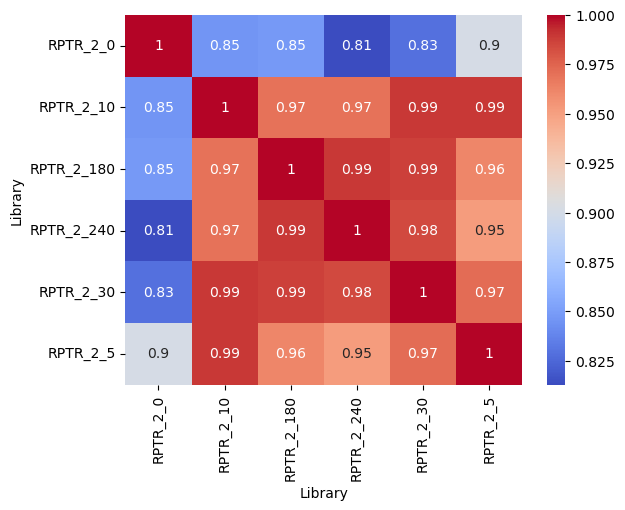

In [9]:
Rexp2_corr = Rexp2_collapsed.corr()
sns.heatmap(Rexp2_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/1217233734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Rexp2_corr = Rexp2_collapsed.corr(method='spearman')


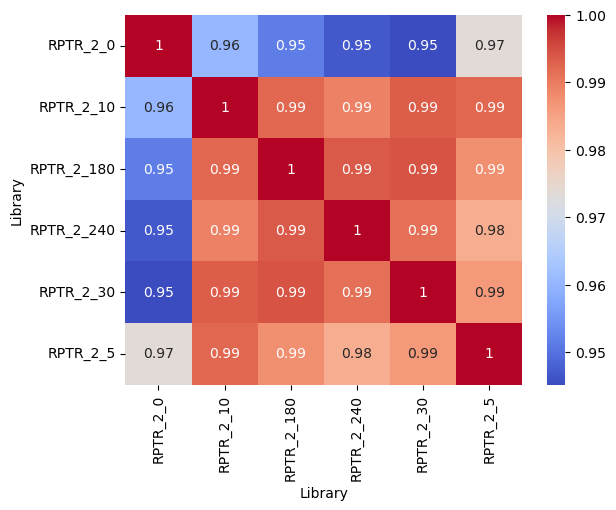

In [10]:
Rexp2_corr = Rexp2_collapsed.corr(method='spearman')
sns.heatmap(Rexp2_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/417843244.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Rexp4_corr = Rexp4_collapsed.corr()


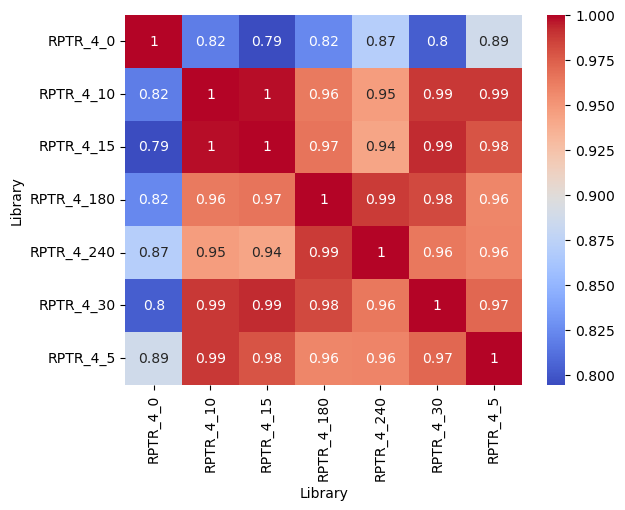

In [11]:
Rexp4_collapsed = Rexp4.pivot_table(index='index', columns='Library', values='R_Normalized').reset_index().fillna(1e-10)

Rexp4_corr = Rexp4_collapsed.corr()
sns.heatmap(Rexp4_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/947318569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Rexp4_corr = Rexp4_collapsed.corr(method='spearman')


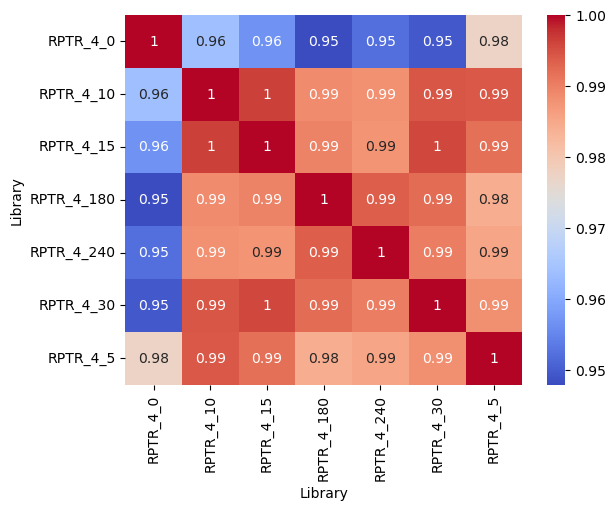

In [12]:
Rexp4_corr = Rexp4_collapsed.corr(method='spearman')
sns.heatmap(Rexp4_corr, annot=True, cmap='coolwarm')
plt.show()

### How do RPTR reads change over time?

In [13]:
Rexp4_collapsed = Rexp4_collapsed.set_index('index')
Rexp4_collapsed

Library             RPTR_4_0     RPTR_4_10     RPTR_4_15    RPTR_4_180  \
index                                                                    
AAAAAACCCAAACC  1.034094e-04  1.071398e-04  8.845742e-05  1.399498e-04   
AAAAATGTAGGTTG  9.074706e-05  5.662403e-05  4.730880e-05  3.338497e-05   
AAAACAAAAAACGA  1.000000e-10  3.054155e-08  3.460776e-08  2.670798e-08   
AAAACAGTATTAGG  1.000000e-10  1.000000e-10  3.460776e-08  2.670798e-08   
AAAAGTTCCGGCAG  2.727487e-05  9.223548e-06  7.025374e-06  6.329791e-06   
...                      ...           ...           ...           ...   
TTTTGCATCAGATT  1.000000e-10  9.162465e-08  3.114698e-07  9.614872e-07   
TTTTGGGATCCTAC  1.131066e-04  6.074714e-05  5.675672e-05  4.465574e-05   
TTTTGTACTAGCGA  2.703445e-05  2.950314e-05  3.208139e-05  3.199616e-05   
TTTTGTCAAAATTT  2.428292e-05  1.459886e-05  1.463908e-05  1.295337e-05   
TTTTTGCTCGCCTG  5.361476e-05  2.770119e-05  2.149142e-05  2.820363e-05   

Library           RPTR_4_240     RPTR_4_30      RPTR_4_5  
index                                                     
AAAAAACCCAAACC  1.345781e-04  1.202859e-04  9.143987e-05  
AAAAATGTAGGTTG  5.433449e-05  4.158494e-05  6.074301e-05  
AAAACAAAAAACGA  1.000000e-10  1.000000e-10  1.000000e-10  
AAAACAGTATTAGG  1.000000e-10  1.000000e-10  1.000000e-10  
AAAAGTTCCGGCAG  7.244599e-06  7.743873e-06  1.315580e-05  
...                      ...           ...           ...  
TTTTGCATCAGATT  1.106046e-07  1.023419e-07  5.375487e-07  
TTTTGGGATCCTAC  6.865779e-05  5.052280e-05  7.387051e-05  
TTTTGTACTAGCGA  3.569762e-05  2.967916e-05  2.339752e-05  
TTTTGTCAAAATTT  1.869217e-05  9.790711e-06  1.717327e-05  
TTTTTGCTCGCCTG  3.307077e-05  2.555137e-05  3.511042e-05  

[3702 rows x 7 columns]

In [14]:
Rexp4_collapsed = Rexp4_collapsed[['RPTR_4_0', 'RPTR_4_5', 'RPTR_4_10', 'RPTR_4_15', 'RPTR_4_30', 'RPTR_4_180', 'RPTR_4_240']]
Rexp4_collapsed

Library             RPTR_4_0      RPTR_4_5     RPTR_4_10     RPTR_4_15  \
index                                                                    
AAAAAACCCAAACC  1.034094e-04  9.143987e-05  1.071398e-04  8.845742e-05   
AAAAATGTAGGTTG  9.074706e-05  6.074301e-05  5.662403e-05  4.730880e-05   
AAAACAAAAAACGA  1.000000e-10  1.000000e-10  3.054155e-08  3.460776e-08   
AAAACAGTATTAGG  1.000000e-10  1.000000e-10  1.000000e-10  3.460776e-08   
AAAAGTTCCGGCAG  2.727487e-05  1.315580e-05  9.223548e-06  7.025374e-06   
...                      ...           ...           ...           ...   
TTTTGCATCAGATT  1.000000e-10  5.375487e-07  9.162465e-08  3.114698e-07   
TTTTGGGATCCTAC  1.131066e-04  7.387051e-05  6.074714e-05  5.675672e-05   
TTTTGTACTAGCGA  2.703445e-05  2.339752e-05  2.950314e-05  3.208139e-05   
TTTTGTCAAAATTT  2.428292e-05  1.717327e-05  1.459886e-05  1.463908e-05   
TTTTTGCTCGCCTG  5.361476e-05  3.511042e-05  2.770119e-05  2.149142e-05   

Library            RPTR_4_30    RPTR_4_180    RPTR_4_240  
index                                                     
AAAAAACCCAAACC  1.202859e-04  1.399498e-04  1.345781e-04  
AAAAATGTAGGTTG  4.158494e-05  3.338497e-05  5.433449e-05  
AAAACAAAAAACGA  1.000000e-10  2.670798e-08  1.000000e-10  
AAAACAGTATTAGG  1.000000e-10  2.670798e-08  1.000000e-10  
AAAAGTTCCGGCAG  7.743873e-06  6.329791e-06  7.244599e-06  
...                      ...           ...           ...  
TTTTGCATCAGATT  1.023419e-07  9.614872e-07  1.106046e-07  
TTTTGGGATCCTAC  5.052280e-05  4.465574e-05  6.865779e-05  
TTTTGTACTAGCGA  2.967916e-05  3.199616e-05  3.569762e-05  
TTTTGTCAAAATTT  9.790711e-06  1.295337e-05  1.869217e-05  
TTTTTGCTCGCCTG  2.555137e-05  2.820363e-05  3.307077e-05  

[3702 rows x 7 columns]

In [15]:
Rexp4_pctchange = Rexp4_collapsed.pct_change(axis='columns')*100
Rexp4_pctchange = Rexp4_pctchange.fillna(0)
Rexp4_pctchange.head()

Library         RPTR_4_0   RPTR_4_5     RPTR_4_10     RPTR_4_15  RPTR_4_30  \
index                                                                        
AAAAAACCCAAACC       0.0 -11.574934     17.169632    -17.437348  35.981666   
AAAAATGTAGGTTG       0.0 -33.063391     -6.780983    -16.451020 -12.098944   
AAAACAAAAAACGA       0.0   0.000000  30441.549625     13.313687 -99.711047   
AAAACAGTATTAGG       0.0   0.000000      0.000000  34507.755868 -99.711047   
AAAAGTTCCGGCAG       0.0 -51.765873    -29.889862    -23.832191  10.227186   

Library           RPTR_4_180  RPTR_4_240  
index                                     
AAAAAACCCAAACC     16.347662   -3.838303  
AAAAATGTAGGTTG    -19.718591   62.751351  
AAAACAAAAAACGA  26607.978568  -99.625580  
AAAACAGTATTAGG  26607.978568  -99.625580  
AAAAGTTCCGGCAG    -18.260652   14.452427

In [16]:
Rexp4_pctchange = Rexp4_pctchange.reset_index()
Rexp4_pctchange_melt = Rexp4_pctchange.melt(id_vars='index', var_name='Time', value_name='Pct_change')
Rexp4_pctchange_melt

index        Time  Pct_change
0      AAAAAACCCAAACC    RPTR_4_0    0.000000
1      AAAAATGTAGGTTG    RPTR_4_0    0.000000
2      AAAACAAAAAACGA    RPTR_4_0    0.000000
3      AAAACAGTATTAGG    RPTR_4_0    0.000000
4      AAAAGTTCCGGCAG    RPTR_4_0    0.000000
...               ...         ...         ...
25909  TTTTGCATCAGATT  RPTR_4_240  -88.496512
25910  TTTTGGGATCCTAC  RPTR_4_240   53.749073
25911  TTTTGTACTAGCGA  RPTR_4_240   11.568472
25912  TTTTGTCAAAATTT  RPTR_4_240   44.303551
25913  TTTTTGCTCGCCTG  RPTR_4_240   17.257147

[25914 rows x 3 columns]

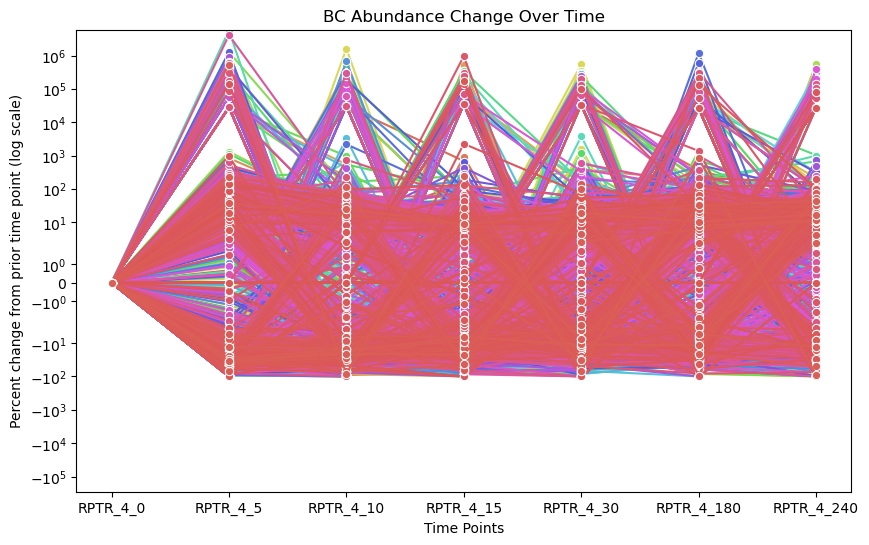

In [19]:
# time_order = ['RPTR_4_0', 'RPTR_4_5', 'RPTR_4_10', 'RPTR_4_15', 'RPTR_4_30', 'RPTR_4_180', 'RPTR_4_240']
# # Convert the 'Time' column to a categorical type with the specified order
# Rexp4_pctchange_melt['Time'] = pd.Categorical(Rexp4_pctchange_melt['Time'], categories=time_order, ordered=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=Rexp4_pctchange_melt, x='Time', y='Pct_change', 
             hue='index', marker='o', legend=False, palette='hls')

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('BC Abundance Change Over Time')
plt.xlabel('Time Points')
plt.ylabel('Percent change from prior time point (log scale)')
plt.show()

### How do the most active change over time?

In [15]:
#read in facs data for controls
facs = pd.read_csv('Gcn4OrthologData_ToShare_20230414_EC.csv', usecols=['Name','ArrayDNA','is_control']).dropna(0)
facs.tail()

/tmp/ipykernel_7174/2916010655.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  facs = pd.read_csv('Gcn4OrthologData_ToShare_20230414_EC.csv', usecols=['Name','ArrayDNA','is_control']).dropna(0)


Name is_control  \
20726     Gnc4Lib_Kappa_HIGH_0       high   
20727  Gnc4Lib_Disorder_HIGH_0       high   
20728  Gnc4Lib_Disorder_HIGH_0       high   
20729    Gnc4Lib_Charge_HIGH_0        mid   
20730  Gnc4Lib_Disorder_HIGH_0       high   

                                                ArrayDNA  
20726  GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...  
20727  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  
20728  ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...  
20729  TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...  
20730  AATACTGATTCTACTCATATGTTTGAATATTGGGCTTTGGAAGATA...

In [21]:
def extract_tile(putative_tile):
    # Remove the surrounding square brackets and quotes
    clean_str = putative_tile.strip("[]").replace("'", "")
    # Split by hyphen and take the first part
    tile_str = clean_str.split('-')[0]
    return tile_str

In [23]:
Rexp4_wTile = Rexp4.copy()
Rexp4_wTile['Tile'] = Rexp4_wTile["PutativeTileADBC"].apply(extract_tile)
Rexp4_wTile.head()

index     BCs                                   PutativeTileADBC  \
0  CCTGGGATATGAGT  166623  ['GATTCTTTGTTTGAATCTCAAGATTTGTTTGCTTCTCCAGTTAA...   
1  GCTTCTCCGCACAT  140648  ['ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAA...   
2  GTCCAGTTTAGTGA  139869  ['ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATT...   
3  TGGGCCGGAATTGC  138203  ['GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTT...   
4  GGAGGGGTCAGAAG  123727  ['TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATT...   

    Library  Allreads  R_Normalized  \
0  RPTR_4_0  37433719      0.004451   
1  RPTR_4_0  37433719      0.003757   
2  RPTR_4_0  37433719      0.003736   
3  RPTR_4_0  37433719      0.003692   
4  RPTR_4_0  37433719      0.003305   

                                                Tile  
0  GATTCTTTGTTTGAATCTCAAGATTTGTTTGCTTCTCCAGTTAAAC...  
1  ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...  
2  ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...  
3  GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...  
4  TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATTGT...

In [24]:
intersection4 = pd.merge(Rexp4_wTile, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection4 = intersection4[['index', 'Library', 'R_Normalized', 'is_control']]
# intersection4 = intersection4.set_index('index')
intersection4_piv = intersection4.pivot_table(index=['index', 'is_control'], columns='Library', values='R_Normalized').reset_index().fillna(1e-10)
intersection4_piv = intersection4_piv.set_index(['index','is_control'])
intersection4_piv = intersection4_piv[['RPTR_4_0', 'RPTR_4_5', 'RPTR_4_10', 'RPTR_4_15', 'RPTR_4_30', 'RPTR_4_180', 'RPTR_4_240']]
intersection4_p = intersection4_piv.pct_change(axis='columns')*100
intersection4_p = intersection4_p.fillna(0)
intersection4_p.head()

Library                      RPTR_4_0   RPTR_4_5     RPTR_4_10     RPTR_4_15  \
index          is_control                                                      
AAAAAACCCAAACC experimental       0.0 -11.574934     17.169632    -17.437348   
AAAAATGTAGGTTG experimental       0.0 -33.063391     -6.780983    -16.451020   
AAAACAAAAAACGA experimental       0.0   0.000000  30441.549625     13.313687   
AAAACAGTATTAGG experimental       0.0   0.000000      0.000000  34507.755868   
AAAAGTTCCGGCAG experimental       0.0 -51.765873    -29.889862    -23.832191   

Library                      RPTR_4_30    RPTR_4_180  RPTR_4_240  
index          is_control                                         
AAAAAACCCAAACC experimental  35.981666     16.347662   -3.838303  
AAAAATGTAGGTTG experimental -12.098944    -19.718591   62.751351  
AAAACAAAAAACGA experimental -99.711047  26607.978568  -99.625580  
AAAACAGTATTAGG experimental -99.711047  26607.978568  -99.625580  
AAAAGTTCCGGCAG experimental  10.227186    -18.260652   14.452427

In [25]:
intersection4_melt = intersection4_p.reset_index()
intersection4_melt = intersection4_melt.melt(id_vars=['index','is_control'], var_name='Time', value_name='Pct_change')
intersection4_melt.head()

index    is_control      Time  Pct_change
0  AAAAAACCCAAACC  experimental  RPTR_4_0         0.0
1  AAAAATGTAGGTTG  experimental  RPTR_4_0         0.0
2  AAAACAAAAAACGA  experimental  RPTR_4_0         0.0
3  AAAACAGTATTAGG  experimental  RPTR_4_0         0.0
4  AAAAGTTCCGGCAG  experimental  RPTR_4_0         0.0

In [26]:
time_order = ['RPTR_4_0', 'RPTR_4_5', 'RPTR_4_10', 'RPTR_4_15', 'RPTR_4_30', 'RPTR_4_180', 'RPTR_4_240']
# Convert the 'Time' column to a categorical type with the specified order
intersection4_melt['Time'] = pd.Categorical(intersection4_melt['Time'], categories=time_order, ordered=True)

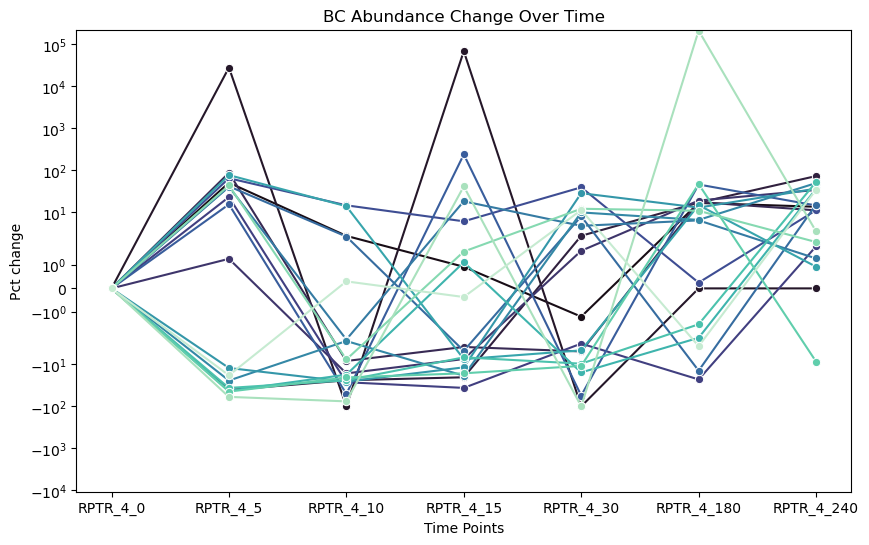

In [32]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=intersection4_melt[intersection4_melt['is_control']!='experimental'], 
             x='Time', y='Pct_change', 
             hue='index', marker='o', palette='mako',
            legend=False,
            )

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('BC Abundance Change Over Time')
plt.xlabel('Time Points')
plt.ylabel('Pct change')
plt.show()

### Look at how the same group has changed from t=0

In [33]:
intersection4_piv.head()

Library                          RPTR_4_0      RPTR_4_5     RPTR_4_10  \
index          is_control                                               
AAAAAACCCAAACC experimental  1.034094e-04  9.143987e-05  1.071398e-04   
AAAAATGTAGGTTG experimental  9.074706e-05  6.074301e-05  5.662403e-05   
AAAACAAAAAACGA experimental  1.000000e-10  1.000000e-10  3.054155e-08   
AAAACAGTATTAGG experimental  1.000000e-10  1.000000e-10  1.000000e-10   
AAAAGTTCCGGCAG experimental  2.727487e-05  1.315580e-05  9.223548e-06   

Library                         RPTR_4_15     RPTR_4_30    RPTR_4_180  \
index          is_control                                               
AAAAAACCCAAACC experimental  8.845742e-05  1.202859e-04  1.399498e-04   
AAAAATGTAGGTTG experimental  4.730880e-05  4.158494e-05  3.338497e-05   
AAAACAAAAAACGA experimental  3.460776e-08  1.000000e-10  2.670798e-08   
AAAACAGTATTAGG experimental  3.460776e-08  1.000000e-10  2.670798e-08   
AAAAGTTCCGGCAG experimental  7.025374e-06  7.743873e-06  6.329791e-06   

Library                        RPTR_4_240  
index          is_control                  
AAAAAACCCAAACC experimental  1.345781e-04  
AAAAATGTAGGTTG experimental  5.433449e-05  
AAAACAAAAAACGA experimental  1.000000e-10  
AAAACAGTATTAGG experimental  1.000000e-10  
AAAAGTTCCGGCAG experimental  7.244599e-06

In [34]:
intersection4_gpc = pd.DataFrame()
intersection4_gpc['005'] = ((intersection4_piv['RPTR_4_5']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)
intersection4_gpc['010'] = ((intersection4_piv['RPTR_4_10']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)
intersection4_gpc['015'] = ((intersection4_piv['RPTR_4_15']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)
intersection4_gpc['030'] = ((intersection4_piv['RPTR_4_30']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)
intersection4_gpc['180'] = ((intersection4_piv['RPTR_4_180']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)
intersection4_gpc['240'] = ((intersection4_piv['RPTR_4_240']-intersection4_piv['RPTR_4_0'])/(intersection4_piv['RPTR_4_0'])*100)

intersection4_gpc.head()


005           010           015        030  \
index          is_control                                                       
AAAAAACCCAAACC experimental -11.574934      3.607324    -14.459045  16.320016   
AAAAATGTAGGTTG experimental -33.063391    -37.602351    -47.867400 -54.174894   
AAAACAAAAAACGA experimental   0.000000  30441.549625  34507.755868   0.000000   
AAAACAGTATTAGG experimental   0.000000      0.000000  34507.755868   0.000000   
AAAAGTTCCGGCAG experimental -51.765873    -66.182987    -74.242322 -71.608036   

                                      180        240  
index          is_control                             
AAAAAACCCAAACC experimental     35.335618  30.141027  
AAAAATGTAGGTTG experimental    -63.210959 -40.125340  
AAAACAAAAAACGA experimental  26607.978568   0.000000  
AAAACAGTATTAGG experimental  26607.978568   0.000000  
AAAAGTTCCGGCAG experimental    -76.792594 -73.438561

In [35]:
intersection4_gpc_melt = intersection4_gpc.reset_index()
intersection4_gpc_melt = intersection4_gpc_melt.melt(id_vars=['index','is_control'], var_name='Time', value_name='Pct_change')
intersection4_gpc_melt.head()


index    is_control Time  Pct_change
0  AAAAAACCCAAACC  experimental  005  -11.574934
1  AAAAATGTAGGTTG  experimental  005  -33.063391
2  AAAACAAAAAACGA  experimental  005    0.000000
3  AAAACAGTATTAGG  experimental  005    0.000000
4  AAAAGTTCCGGCAG  experimental  005  -51.765873

Plot same tiles' activities against each other

In [36]:
intersection4_gpc_melt[intersection4_gpc_melt['is_control']!='experimental']


index is_control Time    Pct_change
234    ACATCAACTCTGAT        mid  005     50.951110
380    AGAGGCGAAGGGAG        low  005  28192.038227
518    AGTGTATTATGTAT        low  005    -40.728357
951    CATAGGTATCATTC        mid  005     87.439678
1155   CCCTACGCCCCATG        low  005      1.267931
...               ...        ...  ...           ...
21484  TCTACCTGCCCCGC        low  240    -38.657656
21605  TGACTGAGGATGAA        low  240    -55.655975
21983  TTATGAAATCAGTG        mid  240     71.363786
22135  TTGGCCCGTTTCGC        low  240    -82.381530
22176  TTTATGCAGAATGG        mid  240     18.138132

[114 rows x 4 columns]

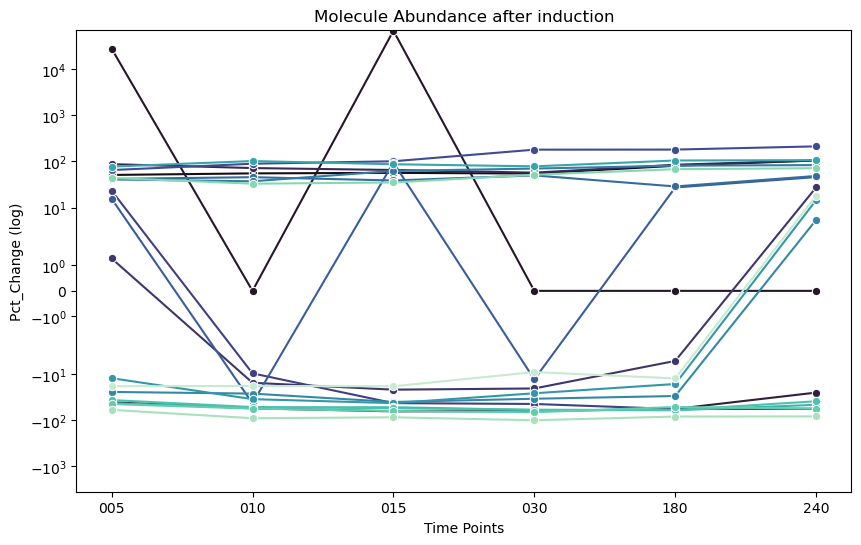

In [37]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=intersection4_gpc_melt[intersection4_gpc_melt['is_control']!='experimental'], 
             x='Time', y='Pct_change', 
             hue='index', marker='o', palette='mako', 
             legend=False
            )

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('Molecule Abundance after induction')
plt.xlabel('Time Points')
plt.ylabel('Pct_Change (log)')
plt.show()

### Visualze change since induction for highs

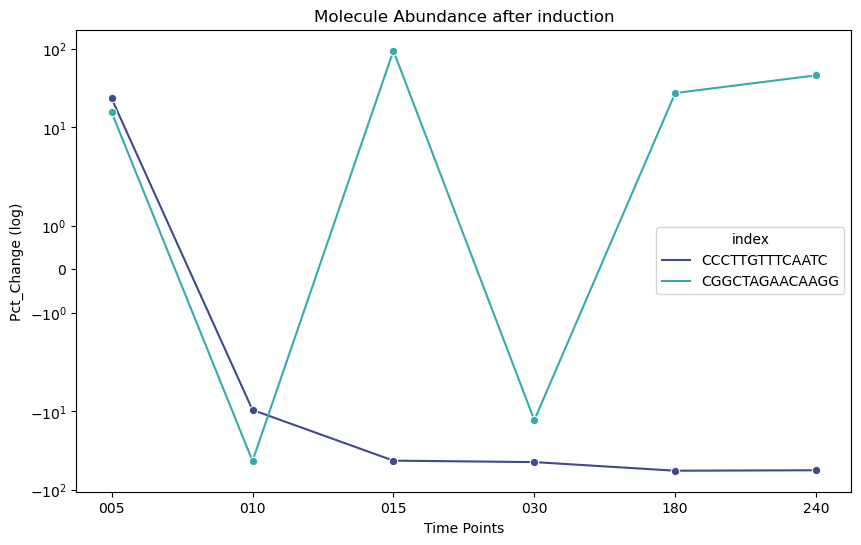

In [40]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=intersection4_gpc_melt[intersection4_gpc_melt['is_control']=='high'], 
             x='Time', y='Pct_change', 
             hue='index', marker='o', palette='mako', 
#              legend=False
            )

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('Molecule Abundance after induction')
plt.xlabel('Time Points')
plt.ylabel('Pct_Change (log)')

#look for CCCTTGTTTCAATC #Gnc4Lib_Disorder_HIGH_0
# CGGCTAGAACAAGG  #Gnc4Lib_Kappa_HIGH_0

plt.show()

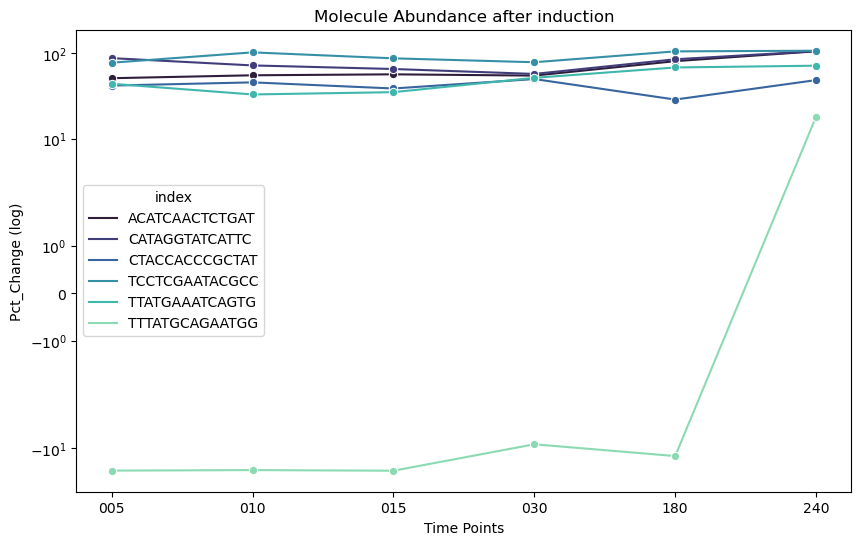

In [41]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=intersection4_gpc_melt[intersection4_gpc_melt['is_control']=='mid'], 
             x='Time', y='Pct_change', 
             hue='index', marker='o', palette='mako', 
#              legend=False
            )

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('Molecule Abundance after induction')
plt.xlabel('Time Points')
plt.ylabel('Pct_Change (log)')
plt.show()

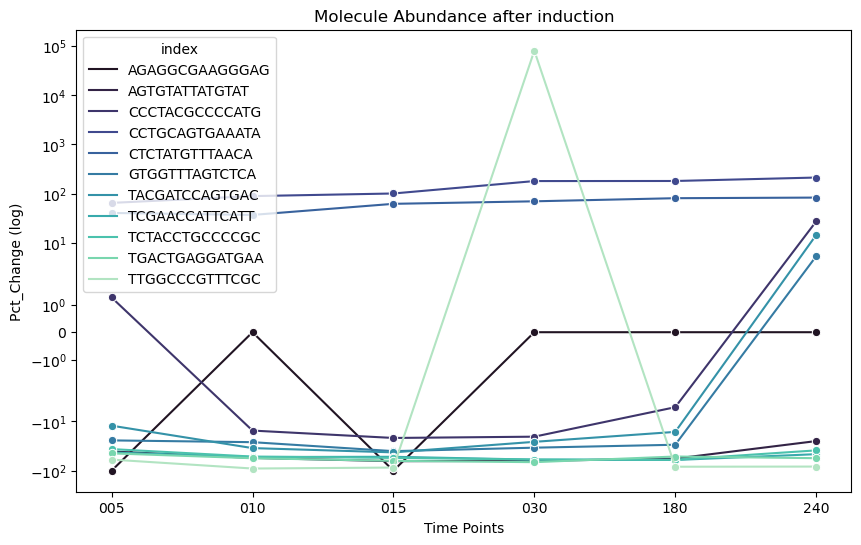

In [113]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=intersection4_gpc_melt[intersection4_gpc_melt['is_control']=='low'], 
             x='Time', y='Pct_change', 
             hue='index', marker='o', palette='mako', 
#              legend=False
            )

# Set y-axis to log scale
plt.yscale('symlog')

plt.title('Molecule Abundance after induction')
plt.xlabel('Time Points')
plt.ylabel('Pct_Change (log)')
plt.show()

In [117]:
controltile = 'TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATAATATGAAAGAATGGACTTCTTTGTTTGATAATGATATTTCTGTTAATACTGATGATTTGTCTTTGGCTGATAAA'

Rexp4_wTile[Rexp4_wTile['Tile']==controltile]


index   BCs  \
2063   CCCTTGTTTCAATC  1253   
5215   CCCTTGTTTCAATC   991   
8794   CCCTTGTTTCAATC   557   
12343  CCCTTGTTTCAATC   539   
15542  CCCTTGTTTCAATC   547   
18632  CCCTTGTTTCAATC  1458   
22569  CCCTTGTTTCAATC   530   

                                        PutativeTileADBC     Library  \
2063   ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...    RPTR_4_0   
5215   ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...   RPTR_4_10   
8794   ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...   RPTR_4_15   
12343  ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...  RPTR_4_180   
15542  ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...   RPTR_4_30   
18632  ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...    RPTR_4_5   
22569  ['TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGA...  RPTR_4_240   

       Allreads  R_Normalized  \
2063   37433719      0.000033   
5215   32742281      0.000030   
8794   28895257      0.000019   
12343  37441995      0.000014   
15542  29313499      0.000019   
18632  35345633      0.000041   
22569  36164871      0.000015   

                                                    Tile  
2063   TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
5215   TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
8794   TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
12343  TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
15542  TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
18632  TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
22569  TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...

In [119]:
controlbc = 'CGGCTAGAACAAGG'
Rexp4_wTile[Rexp4_wTile['index']==controlbc].loc[3185,'Tile']


'GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTGCTGAAATTGAATGGACTACTTTGTTTGAAACTTCTTTGAAGAATGAAACTGATCCATATTCTGATATTAATAAA'

## Step 3: Normalize RPTRs to ADs (Create Ratio)

AD_3_180


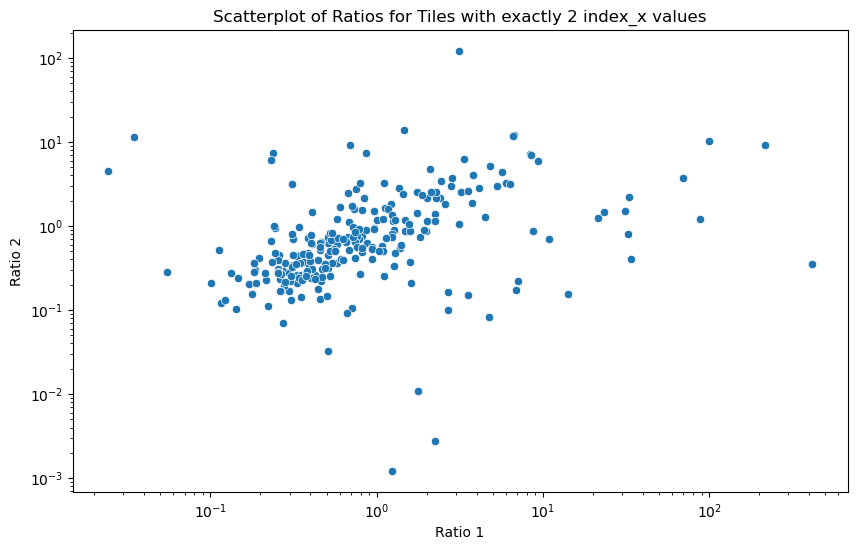

AD_2_30


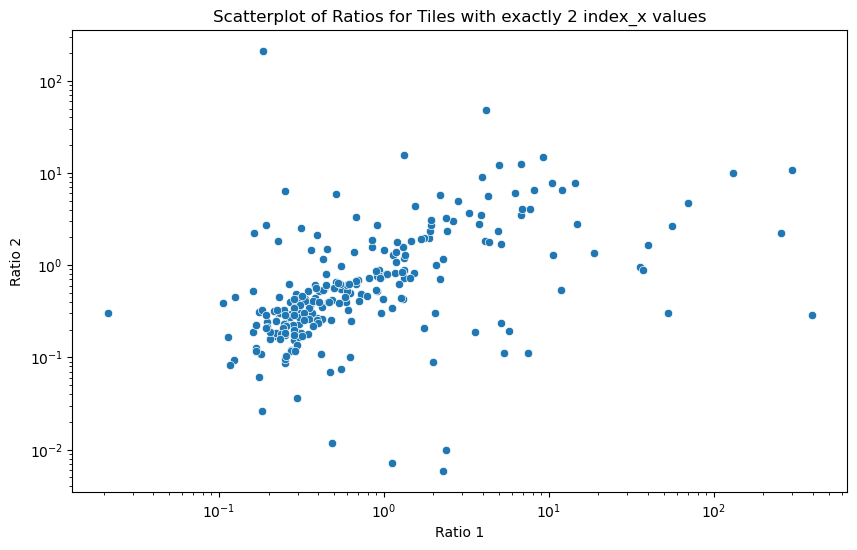

AD_3_10


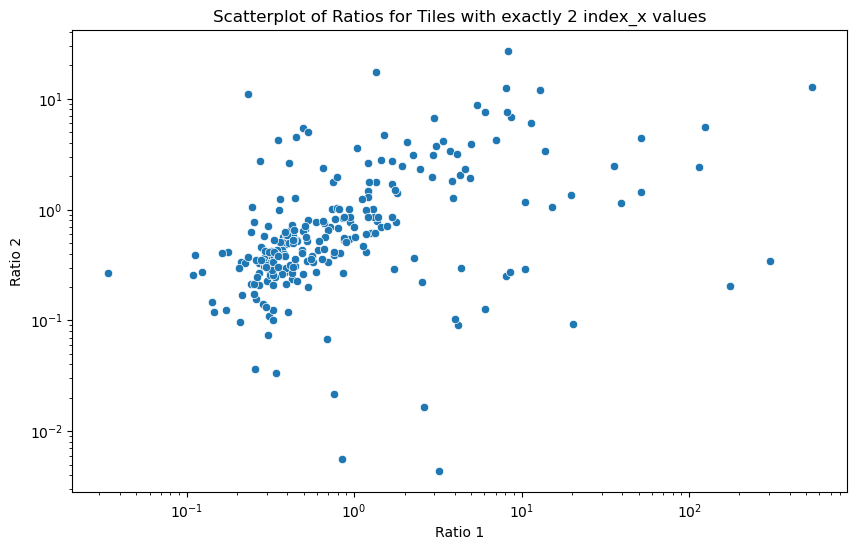

AD_4_15


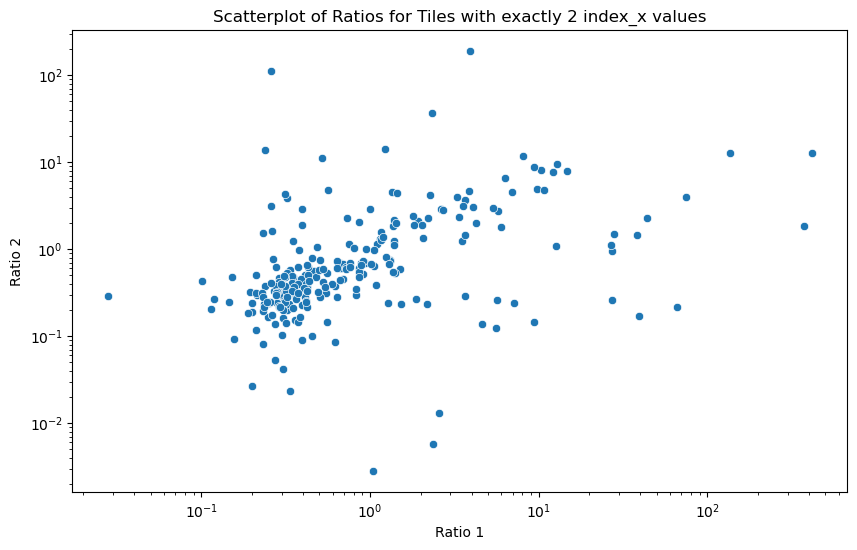

AD_3_15


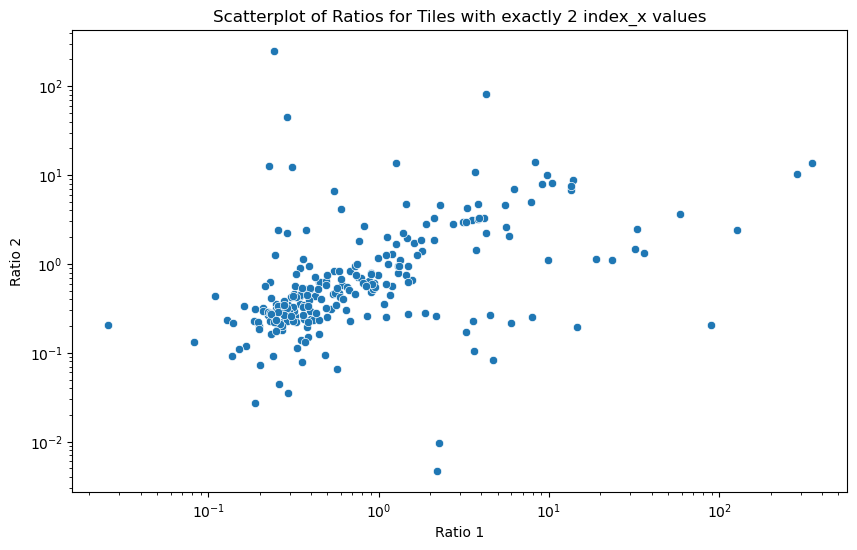

AD_2_5


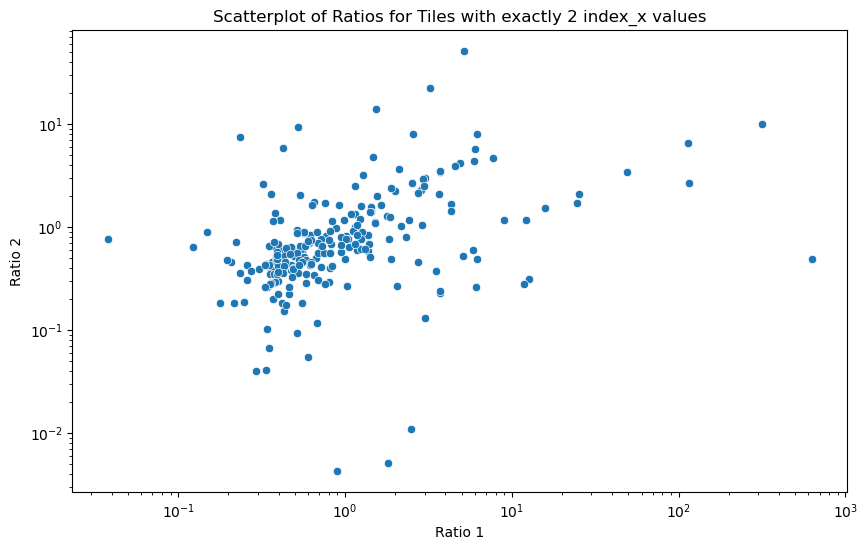

AD_3_0


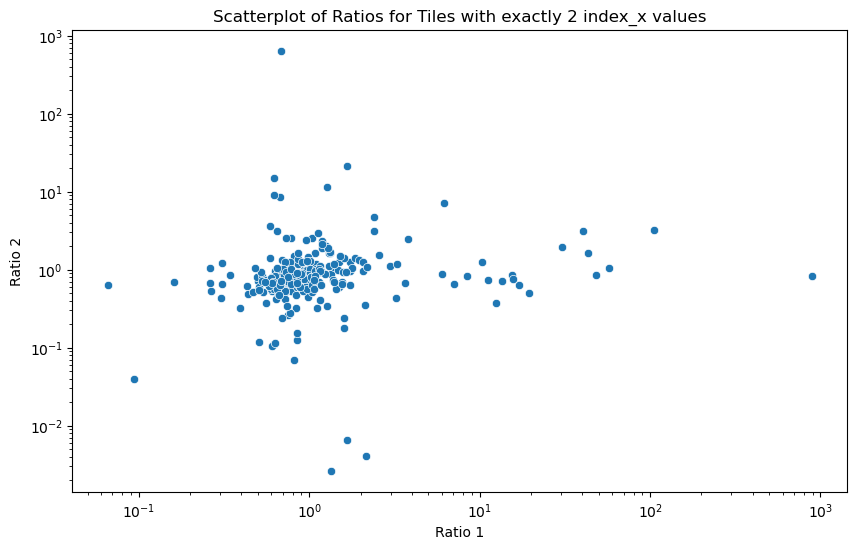

AD_4_0


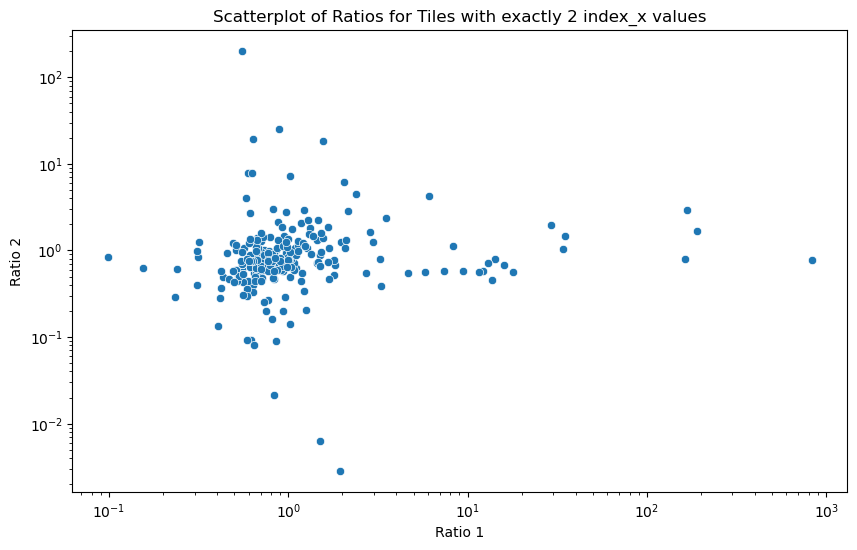

AD_4_10


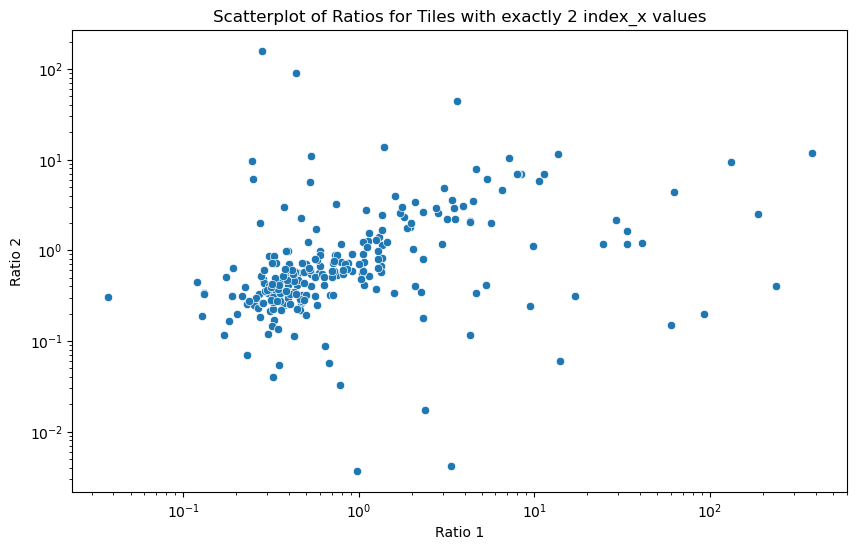

AD_2_10


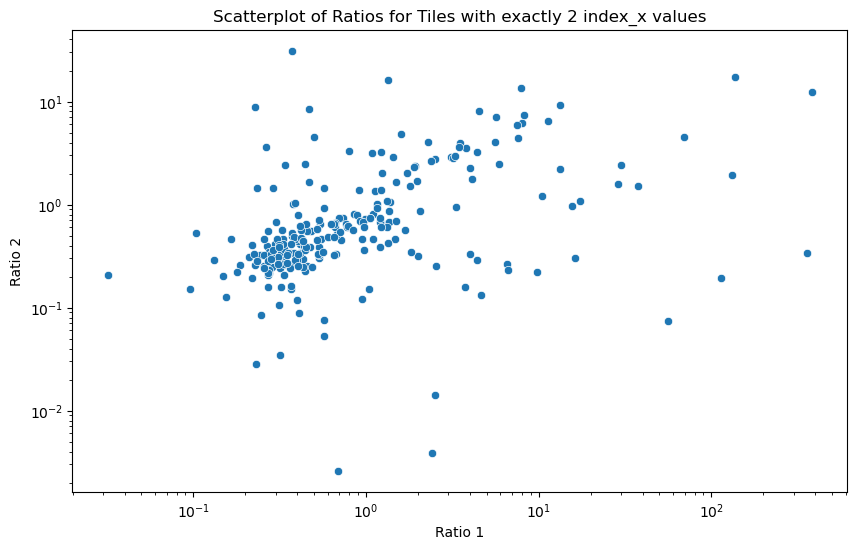

AD_3_240


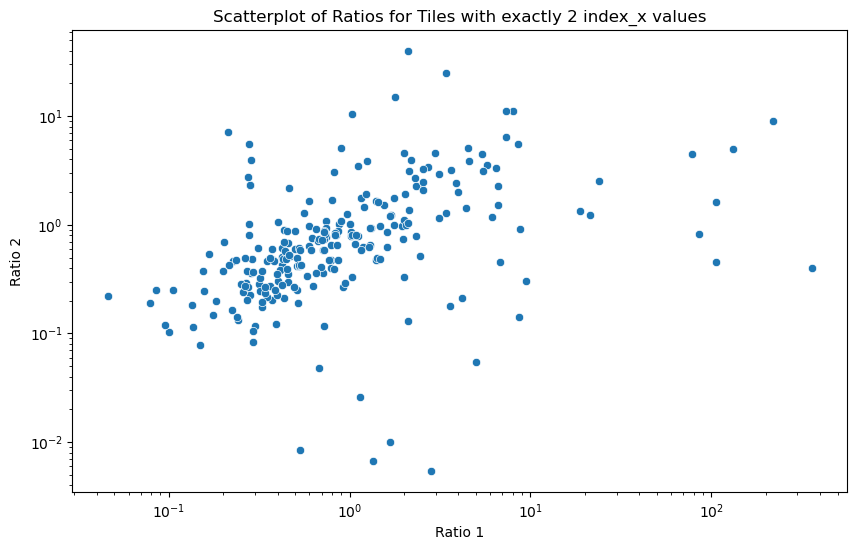

AD_4_180


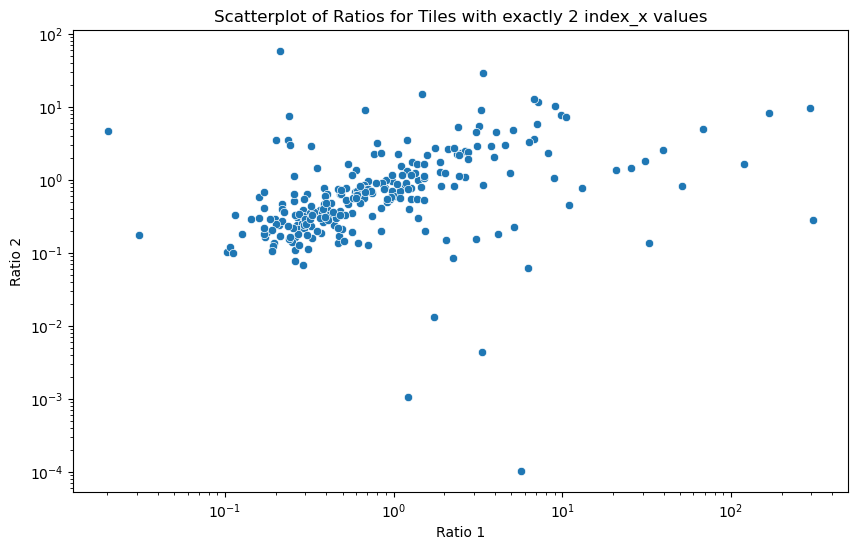

AD_4_30


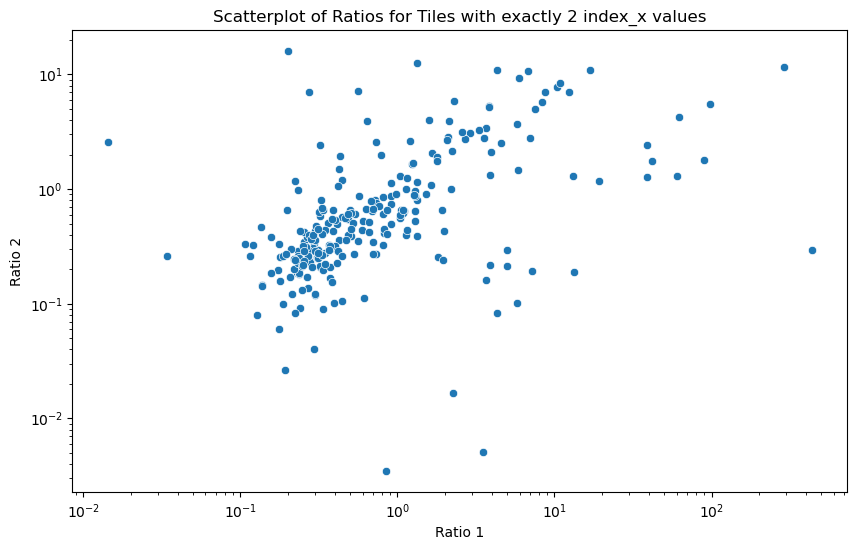

AD_2_180


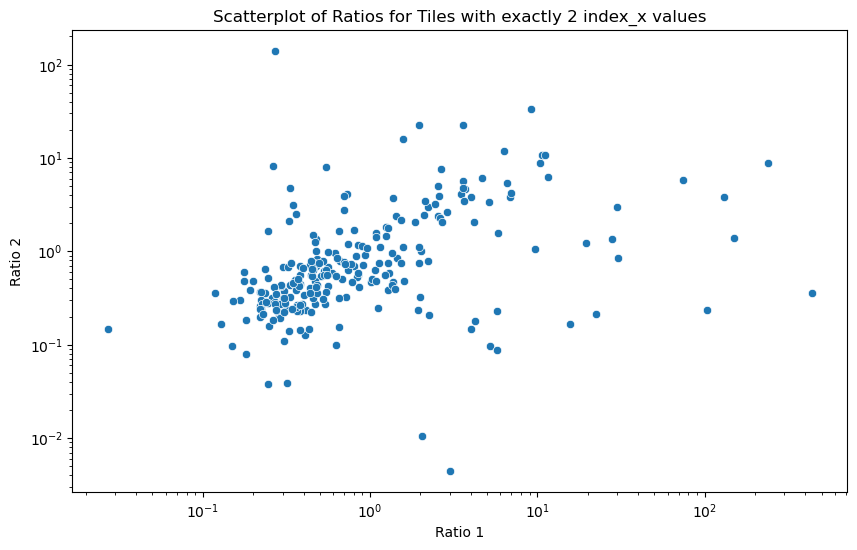

AD_4_5


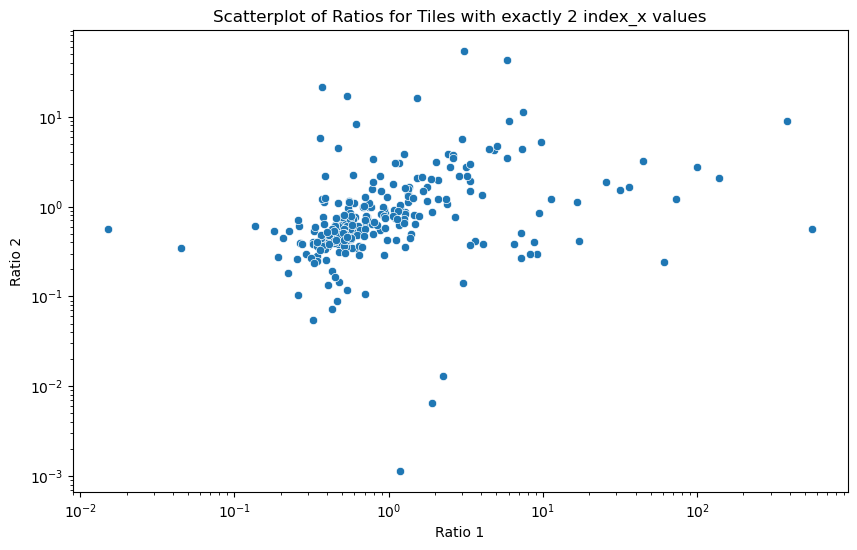

AD_2_0


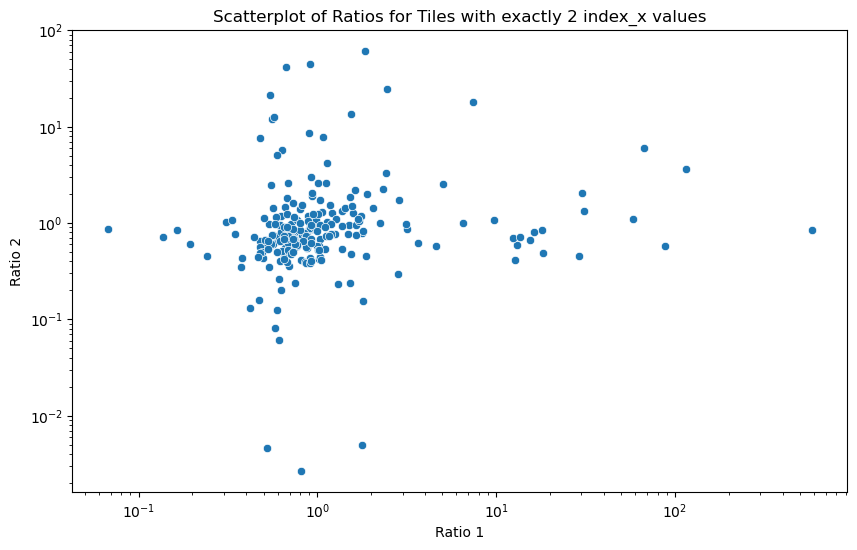

AD_4_240


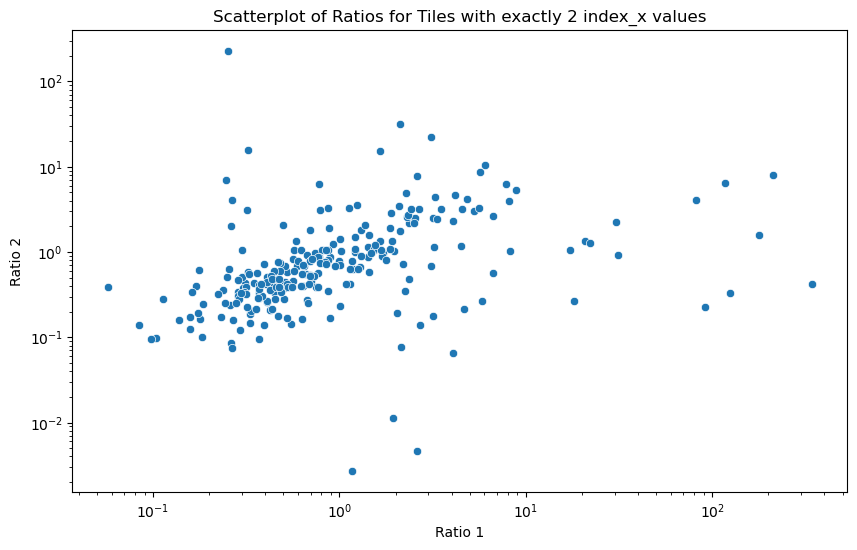

AD_3_5


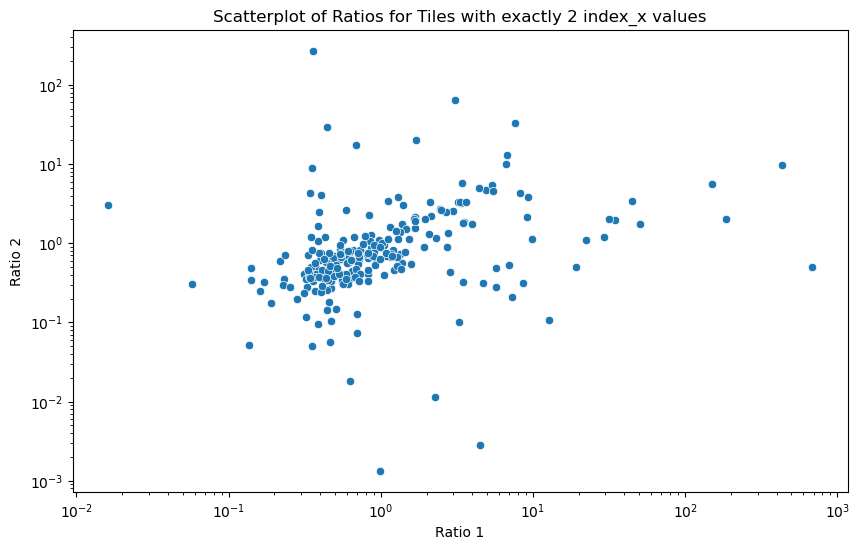

In [44]:
merged_dfs = {}
scatter_dfs = {}

for key in ADexperiments_dict.keys():
    print(key)
    # Extracting the corresponding AD and RPTR dataframes
    ad_df = ADexperiments_dict[key]
    ad_df_size = ad_df.shape[0]
#     print(f'{key} has {ad_df_size} AD entries')
    rptr_df = RPTRexperiments_dict[key.replace("AD", "RPTR")]
    rptr_df_size = rptr_df.shape[0]
#     print(f'{key} has {rptr_df_size} RPTR entries')

    # Merging the dataframes
    merged_df = pd.merge(rptr_df, ad_df, left_on='index', right_on='PutativeRPTR', how='inner')
    merged_df_size = merged_df.shape[0]
#     print(f'{key} has {merged_df_size} merged entries')
#     print('%RPTRloss:', (1-merged_df_size/rptr_df_size) * 100)
#     print('%ADloss:', (1-merged_df_size/ad_df_size) *100)
    merged_df = merged_df.drop(['PutativeTileADBC', 'Library_x','PutativeRPTR'], axis=1)
    merged_df['R_normalized'] = merged_df['BCs'] / merged_df['Allreads_x'] #create a column that normalizes for read depth
    merged_df['A_normalized'] = merged_df['Tile-AD'] / merged_df['Allreads_y'] #create a column that normalizes for read depth
    merged_df['Ratio'] = merged_df['R_normalized'] / merged_df['A_normalized'] 
    
#     # for tiles represented by 2 RPTR BCs, take average of activity
    merged_df[['Tile', 'AD']] = merged_df['index_y'].str.split('-', expand=True) 
#     merged_df = merged_df.groupby('Tile')['Ratio'].mean(numeric_only=False).reset_index() #get means of ratios
#     merged_df = merged_df.rename(columns={'Ratio':'av_Ratio'})

    merged_df = merged_df.drop(['Allreads_x', 'index_y'], axis=1) #june 7
    tile_counts = merged_df.groupby('Tile')['index_x'].nunique().reset_index()
    tile_counts.columns = ['Tile', 'Index_x_Count']
    # Step 2: Filter tiles with only up to 2 `index_x` values
    tiles_with_two_indexes = tile_counts[tile_counts['Index_x_Count'] == 2]['Tile']

    # Merge the original DataFrame with the filtered tiles
    filtered_df = merged_df[merged_df['Tile'].isin(tiles_with_two_indexes)]

    # Create the desired DataFrame format
    tiles = []
    ratios_1 = []
    ratios_2 = []

    for tile in tiles_with_two_indexes:
        ratios = filtered_df[filtered_df['Tile'] == tile]['Ratio'].values
        if len(ratios) == 2:
            tiles.append(tile)
            ratios_1.append(ratios[0])
            ratios_2.append(ratios[1])

    scatter_df = pd.DataFrame({
        'Tile': tiles,
        'Ratio_1': ratios_1,
        'Ratio_2': ratios_2
    })
    scatter_df['Library'] = key
    scatter_dfs[key] = scatter_df
    
    # Step 3: Create the scatterplot
    if not scatter_df.empty:
        plt.figure(figsize=(10, 6))
        p = sns.scatterplot(data=scatter_df, x='Ratio_1', y='Ratio_2')
        plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
        plt.xlabel('Ratio 1')
        plt.ylabel('Ratio 2')
        p.set(xscale="log", yscale="log")
        plt.show()
    
#     Storing the merged dataframe in a dictionary
    merged_dfs[key] = merged_df


In [45]:
# june 7
testtile_counts = merged_dfs['AD_3_180'].groupby('Tile')['index_x'].nunique().reset_index()
testtile_counts.columns = ['Tile', 'Index_x_Count']
testtile_counts.describe()

Index_x_Count
count    2975.000000
mean        1.094118
std         0.310999
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000

In [46]:
testtile_counts[testtile_counts['Index_x_Count']>2]

Tile  Index_x_Count
309   ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTT...              3
423   ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...              4
431   ACTTTGCAAGCTTCTTCTGCTTCTCCAATTCAGAATCCAAGAGTTT...              3
706   ATTCAAGCTTCTGGTTCTCATTCTAGACCATCTTCTGTTTATTCTC...              3
872   CAAGGTGAACCAATGTTAAATTCTTCTAATGATTGGTTCTCTTTGT...              3
875   CAAGTTCCAAGAGTTGCTAGATTGGCTTCTCAATCTACTGGATTTC...              3
1160  CCATCTATTGGTCCAACTATTTCTCCAAGAGAATTGTTGATGAATC...              3
1356  GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAACTT...              3
1574  GCTAATCATGACTTTAATTTGACTTCTCCATTCTCTCATCATCATC...              3
1880  GGTGGTGCTTCTACTACTTATTCTTCTCCAGCTATGCCATCTGTCT...              3
2051  GTTTCTGAAGCTTTGAGATCTTCTGGTAGAAGAAGATCTGGTACTG...              3
2076  TATCATGGTCAACAACAACATAGACCACATTCTACTTTGCAAGCTT...              3
2170  TCTACTCCACAAACTCCTAAAGTTGATCATTTGGGTTGTATTTCTT...              3
2237  TCTAGATTCTCTTTGCCAACTGCTACTATTCCATCTCAAGAATTTA...              3
2951  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...              3

In [47]:
merged_dfs['AD_3_180'][merged_dfs['AD_3_180']['Tile']=='ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTACTGGTCAACATAGAAGACATTCTTCTAATTTGCCATCTGCTTCTTCTTTGCAGAATCAAAGAGTTGCTGCTATT']

index_x    BCs  Tile-AD Library_y  Allreads_y  R_normalized  \
401   ACTGCTCCTCCCTG  11290     6610  AD_3_180    32830117      0.000360   
1120  CCAGCTAATCAATG   2854    11145  AD_3_180    32830117      0.000091   
1863  TCAGTTGATACTTA    906     2337  AD_3_180    32830117      0.000029   
2011  CTCCACAGACCTTA    724     2515  AD_3_180    32830117      0.000023   

      A_normalized     Ratio  \
401       0.000201  1.787061   
1120      0.000339  0.267930   
1863      0.000071  0.405617   
2011      0.000077  0.301195   

                                                   Tile           AD  
401   ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...  CCATAAAAAAA  
1120  ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...  AACAAACCTCT  
1863  ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...  CCGAACATTAG  
2011  ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...  CACTGATGACC

In [48]:
merged_dfs['AD_3_180'][merged_dfs['AD_3_180']['Tile']=='ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTTCTGCTTCTTCTTCTTTGCCAGAAGACTTTGTCTTGTTTCCACCAACTCCAGCTCCAAGACCACCAGCTAGACCA']

index_x  BCs  Tile-AD Library_y  Allreads_y  R_normalized  \
2509  CTATAATGAAAAAG  289      938  AD_3_180    32830117  9.210268e-06   
2800  AAACTAAGTCCTCA  129     1975  AD_3_180    32830117  4.111158e-06   
3146  GCACTTCCAACTCA   12      129  AD_3_180    32830117  3.824333e-07   

      A_normalized     Ratio  \
2509      0.000029  0.322361   
2800      0.000060  0.068339   
3146      0.000004  0.097328   

                                                   Tile           AD  
2509  ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTT...  ACCTGCTCTAC  
2800  ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTT...  GTACCGAGGTG  
3146  ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTT...  CTAGAGAATAC

In [49]:
t0 = []
t5 = []
t10 = []
t15 = []
t30 = []
t180 = []
t240 = []

for key in scatter_dfs.keys():
    if key.endswith('_0'):
        print(key)
        t0.append(scatter_dfs[key])
    if key.endswith('_5'):
        print(key)
        t5.append(scatter_dfs[key])
    if key.endswith('_10'):
        print(key)
        t10.append(scatter_dfs[key])
    if key.endswith('_15'):
        print(key)
        t15.append(scatter_dfs[key])  
    if key.endswith('_30'):
        print(key)
        t30.append(scatter_dfs[key])
    if key.endswith('_180'):
        print(key)
        t180.append(scatter_dfs[key])
    if key.endswith('_240'):
        print(key)
        t240.append(scatter_dfs[key])      
        
t0_all = pd.concat(t0, ignore_index=True)        
t5_all = pd.concat(t5, ignore_index=True)
t10_all = pd.concat(t10, ignore_index=True)
t15_all = pd.concat(t15, ignore_index=True)
t30_all = pd.concat(t30, ignore_index=True)
t180_all = pd.concat(t180, ignore_index=True)
t240_all = pd.concat(t240, ignore_index=True)

t5_all

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_3_0
AD_4_0
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_2_0
AD_4_240
AD_3_5


Tile   Ratio_1   Ratio_2  \
0    AAACCAGTCTTGAAAGTTGAAACTGCTCCAAGATCTCCATTGAAGA...  0.037736  0.762110   
1    AAAGTTAATTCTTCTGATGATTGGGTTGCTTTGTTTGGTGATGATC...  1.250115  1.590007   
2    AACTTCTCTCCAGCTCCAAGATATTCTTCTTCTCCACAAACTACTA...  0.552856  0.571136   
3    AAGAAACCATTGTTGGTTGCTGATTTGCAATATGTTGAAGGTTTGA...  0.404436  1.174517   
4    AAGAGAATTTGGTGGAGAGGTAGAGCTTTGGGTGAGAATACTATGT...  0.518239  0.923560   
..                                                 ...       ...       ...   
732  TTTGATATTAATGGTTCTGCTCCAGGTTCTACTAATATGGGTACTG...  1.054155  0.399521   
733  TTTGATGACTTTACTTCTGGTGCTGGTGGTGATTTGTCTACTTTGT...  2.095949  3.349001   
734  TTTGCTCCATCTATGGCTAGAACTACTTCTGCTTCTTCTGCTTCTC...  0.827829  0.331697   
735  TTTGCTGCTGTTAACTTTGATGGTGCTTCATTCTCTTCTCCAGCTA...  0.506528  0.146884   
736  TTTGGTTCTGCTCCACCATCTACTGCTTTGACTAATTTGACTTCTC...  0.016094  3.036360   

    Library  
0    AD_2_5  
1    AD_2_5  
2    AD_2_5  
3    AD_2_5  
4    AD_2_5  
..      ...  
732  AD_3_5  
733  AD_3_5  
734  AD_3_5  
735  AD_3_5  
736  AD_3_5  

[737 rows x 4 columns]

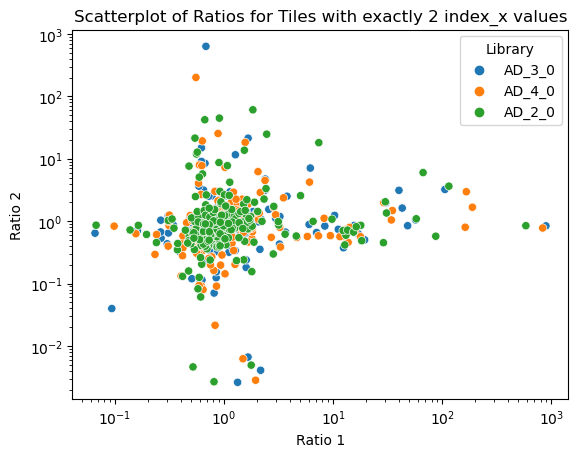

In [50]:
p = sns.scatterplot(data=t0_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

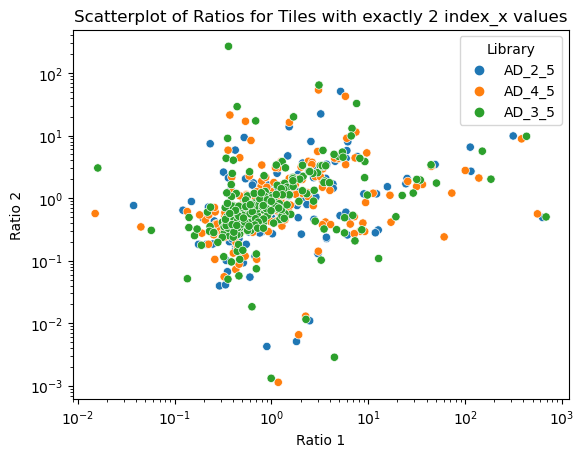

In [51]:
p = sns.scatterplot(data=t5_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

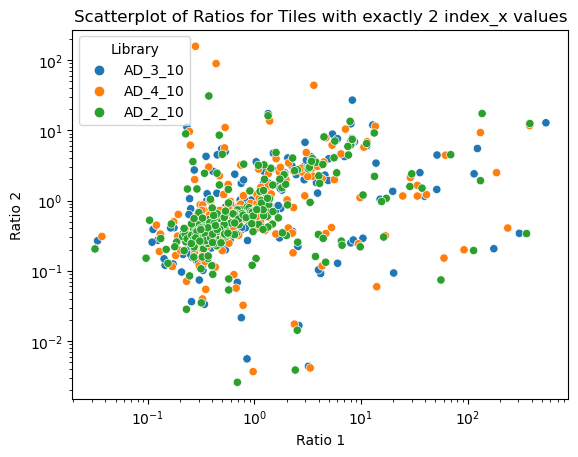

In [52]:
p = sns.scatterplot(data=t10_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

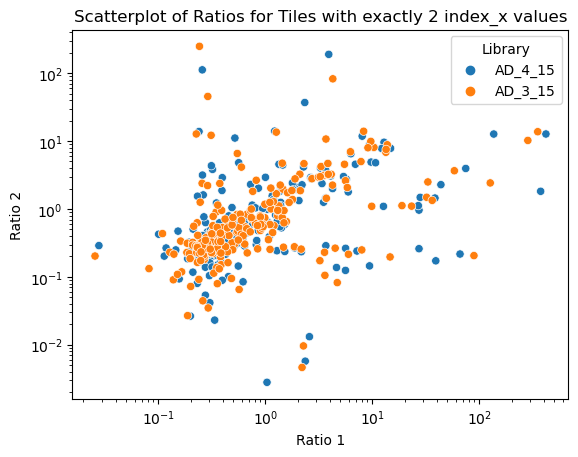

In [53]:
p = sns.scatterplot(data=t15_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

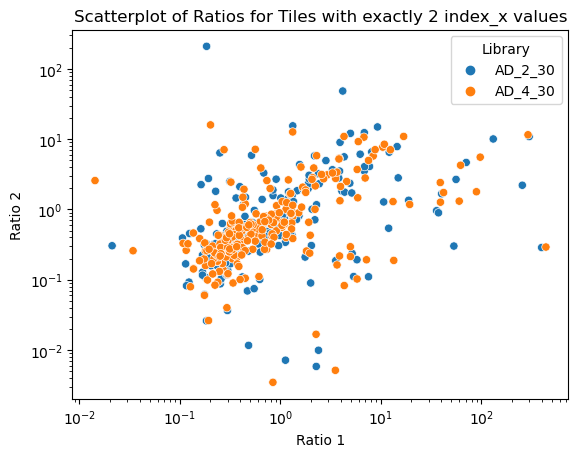

In [54]:
p = sns.scatterplot(data=t30_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

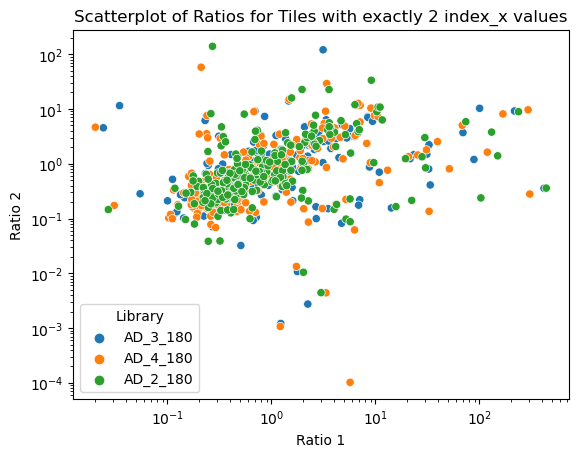

In [55]:
p = sns.scatterplot(data=t180_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

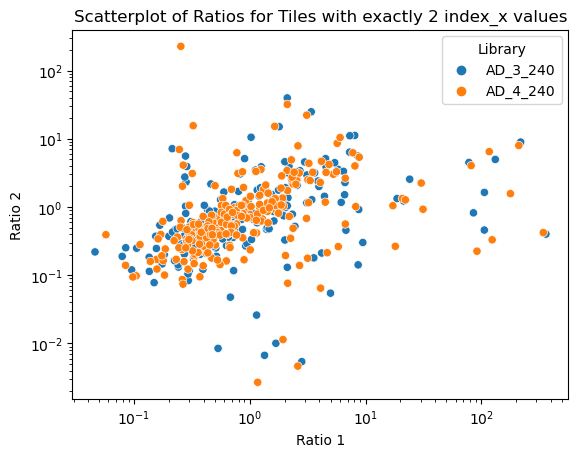

In [56]:
p = sns.scatterplot(data=t240_all, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

In [57]:
# concatenate experimental dataframes
sample2 = []
sample3 = []
sample4 = []
for key in scatter_dfs.keys():
    if key.startswith('AD_2') :
        print(key)
        
        sample2.append(scatter_dfs[key])
    if key.startswith('AD_3') :
        print(key)
     
        sample3.append(scatter_dfs[key])
    if key.startswith('AD_4') :
        print(key)
     
        sample4.append(scatter_dfs[key])  
        
exp2 = pd.concat(sample2, ignore_index=True)
exp3 = pd.concat(sample3, ignore_index=True)
exp4 = pd.concat(sample4, ignore_index=True)

exp2

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_3_0
AD_4_0
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_2_0
AD_4_240
AD_3_5


Tile   Ratio_1    Ratio_2  \
0     AAACCAGTCTTGAAAGTTGAAACTGCTCCAAGATCTCCATTGAAGA...  0.021169   0.304942   
1     AAAGTTAATTCTTCTGATGATTGGGTTGCTTTGTTTGGTGATGATC...  1.888680   1.981446   
2     AACTTCTCTCCAGCTCCAAGATATTCTTCTTCTCCACAAACTACTA...  0.419722   0.353830   
3     AAGAAACCATTGTTGGTTGCTGATTTGCAATATGTTGAAGGTTTGA...  0.271642   0.394017   
4     AAGAGAATTTGGTGGAGAGGTAGAGCTTTGGGTGAGAATACTATGT...  0.264753   0.632661   
...                                                 ...       ...        ...   
1212  TTTGATATTAATGGTTCTGCTCCAGGTTCTACTAATATGGGTACTG...  0.559519  11.908329   
1213  TTTGATGACTTTACTTCTGGTGCTGGTGGTGATTTGTCTACTTTGT...  1.116622   2.590875   
1214  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...  0.568623  12.760965   
1215  TTTGCTCCATCTATGGCTAGAACTACTTCTGCTTCTTCTGCTTCTC...  0.609738   0.260814   
1216  TTTGCTGCTGTTAACTTTGATGGTGCTTCATTCTCTTCTCCAGCTA...  0.474036   0.158970   

      Library  
0     AD_2_30  
1     AD_2_30  
2     AD_2_30  
3     AD_2_30  
4     AD_2_30  
...       ...  
1212   AD_2_0  
1213   AD_2_0  
1214   AD_2_0  
1215   AD_2_0  
1216   AD_2_0  

[1217 rows x 4 columns]

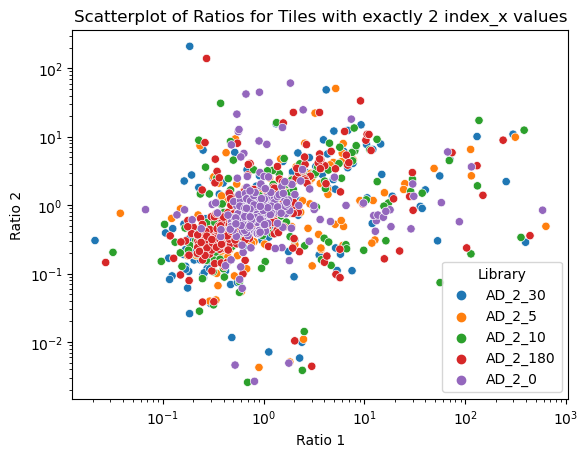

In [58]:
p = sns.scatterplot(data=exp2, x='Ratio_1', y='Ratio_2', hue='Library')
plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
plt.xlabel('Ratio 1')
plt.ylabel('Ratio 2')
p.set(xscale="log", yscale="log")
plt.show()

In [59]:
# end of june 7 playing around

In [9]:
merged_dfs = {}


for key in ADexperiments_dict.keys():
    print(key)
    # Extracting the corresponding AD and RPTR dataframes
    ad_df = ADexperiments_dict[key]
    ad_df_size = ad_df.shape[0]
#     print(f'{key} has {ad_df_size} AD entries')
    rptr_df = RPTRexperiments_dict[key.replace("AD", "RPTR")]
    rptr_df_size = rptr_df.shape[0]
#     print(f'{key} has {rptr_df_size} RPTR entries')

    # Merging the dataframes
    merged_df = pd.merge(rptr_df, ad_df, left_on='index', right_on='PutativeRPTR', how='inner')
    merged_df_size = merged_df.shape[0]
#     print(f'{key} has {merged_df_size} merged entries')
#     print('%RPTRloss:', (1-merged_df_size/rptr_df_size) * 100)
#     print('%ADloss:', (1-merged_df_size/ad_df_size) *100)
    merged_df = merged_df.drop(['PutativeTileADBC', 'Library_x','PutativeRPTR'], axis=1)
    merged_df['R_normalized'] = merged_df['BCs'] / merged_df['Allreads_x'] #create a column that normalizes for read depth
    merged_df['A_normalized'] = merged_df['Tile-AD'] / merged_df['Allreads_y'] #create a column that normalizes for read depth
    merged_df['Ratio'] = merged_df['R_normalized'] / merged_df['A_normalized'] 
    
#     # for tiles represented by 2 RPTR BCs, take average of activity
    merged_df[['Tile', 'AD']] = merged_df['index_y'].str.split('-', expand=True) 
    merged_df = merged_df.groupby('Tile')['Ratio'].mean(numeric_only=False).reset_index() #get means of ratios
    merged_df = merged_df.rename(columns={'Ratio':'av_Ratio'})
    
    #label with library name
    merged_df['Library'] = key

    
    
#     Storing the merged dataframe in a dictionary
    merged_dfs[key] = merged_df


AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_3_0
AD_4_0
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_2_0
AD_4_240
AD_3_5


In [10]:
merged_dfs['AD_3_180']

Tile    av_Ratio   Library
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.144632  AD_3_180
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    1.665917  AD_3_180
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    2.404555  AD_3_180
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.221120  AD_3_180
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.293205  AD_3_180
...                                                 ...         ...       ...
2970  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...    0.816310  AD_3_180
2971  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  160.482860  AD_3_180
2972  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...    0.376141  AD_3_180
2973  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...   10.789736  AD_3_180
2974  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...    0.489136  AD_3_180

[2975 rows x 3 columns]

# FUTURE: t=0 on x axis

In [12]:
#compare time points vs t=0 #June 11
t4_5vs4_0 = pd.merge(merged_dfs['AD_4_5'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_5', '_0'))
# p = sns.jointplot(t4_5vs4_0, 
#                   x='av_Ratio_5', y='av_Ratio_0', 
#                   joint_kws={'alpha': 0.75})
# p.ax_joint.set_xscale('log')
# p.ax_joint.set_yscale('log')
# plt.show()

In [16]:
intersection4_5v0 = pd.merge(t4_5vs4_0, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection4_5v0.head()

Tile  av_Ratio_5 Library_5  \
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.365870    AD_4_5   
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    2.850883    AD_4_5   
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    3.176619    AD_4_5   
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.301449    AD_4_5   
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.445575    AD_4_5   

   av_Ratio_0 Library_0                                               Name  \
0    0.494398    AD_4_0    Cdub_XP_002418875.1_CandidaDubliniensisCD36_246   
1    1.447961    AD_4_0  Sordariomycetes_jgi|Gelte1|443597|fgenesh1_pg....   
2    3.535264    AD_4_0  Eurotiomycetes_jgi|Monpu1|447850|e_gw1.132.11....   
3    0.319998    AD_4_0  Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...   
4    0.832350    AD_4_0     Cdub_XP_002418875.1_CandidaDubliniensisCD36_26   

     is_control                                           ArrayDNA  
0  experimental  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  
1  experimental  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  
2  experimental  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  
3  experimental  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  
4  experimental  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...

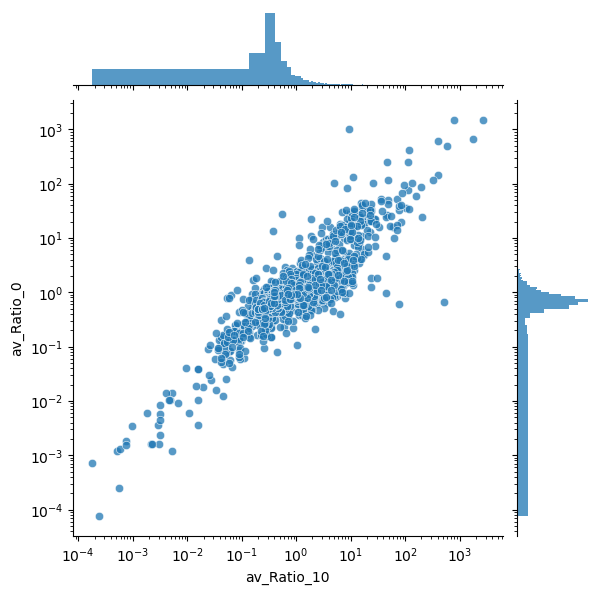

In [9]:
#compare time points vs t=0 #June 12
t4_10vs4_0 = pd.merge(merged_dfs['AD_4_10'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_10', '_0'))
p = sns.jointplot(t4_10vs4_0, 
                  x='av_Ratio_10', y='av_Ratio_0', 
                  joint_kws={'alpha': 0.75})
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

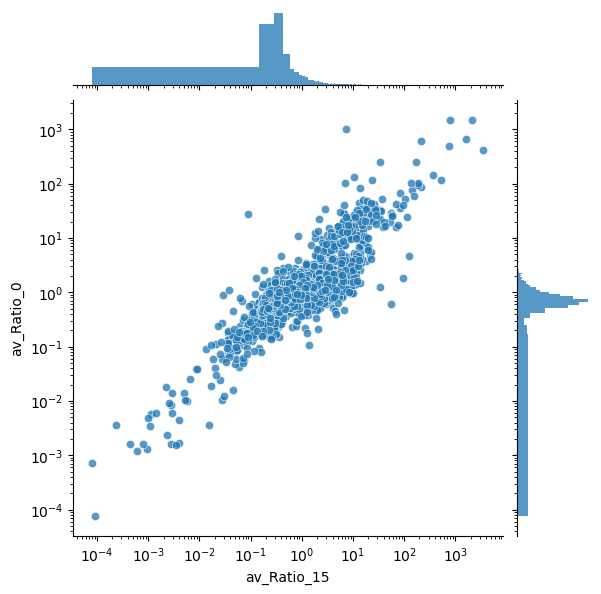

In [10]:
#compare time points vs t=0 #June 12
t4_15vs4_0 = pd.merge(merged_dfs['AD_4_15'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_15', '_0'))
p = sns.jointplot(t4_15vs4_0, 
                  x='av_Ratio_15', y='av_Ratio_0', 
                  joint_kws={'alpha': 0.75})
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

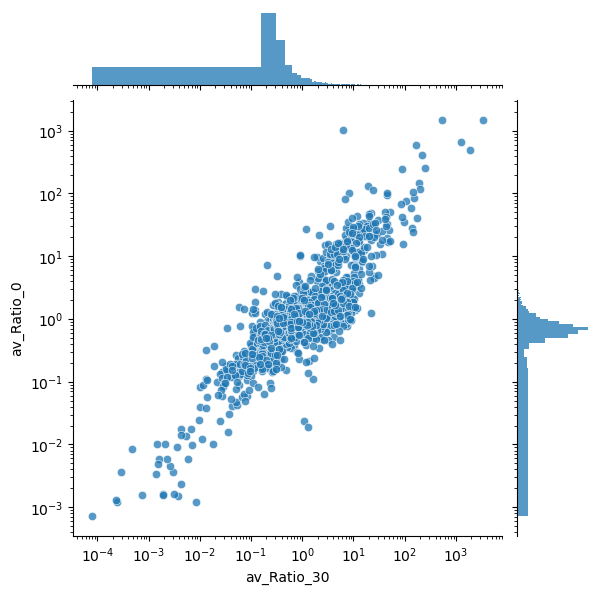

In [12]:
#compare time points vs t=0 #June 12
t4_30vs4_0 = pd.merge(merged_dfs['AD_4_30'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_30', '_0'))
p = sns.jointplot(t4_30vs4_0, 
                  x='av_Ratio_30', y='av_Ratio_0', 
                  joint_kws={'alpha': 0.75})
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

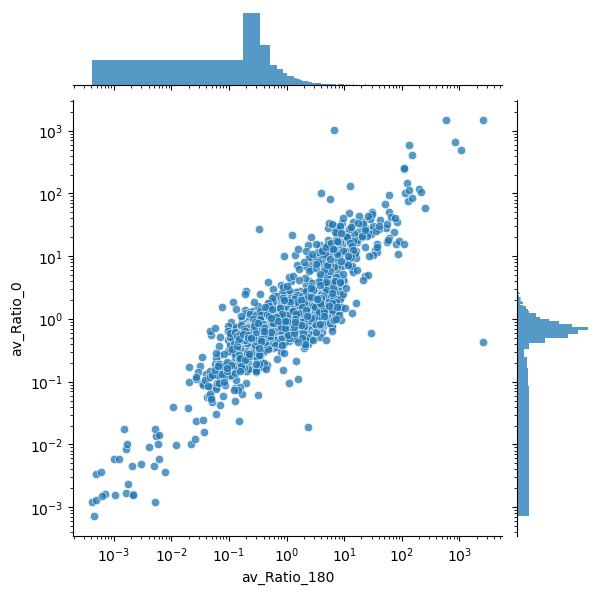

In [13]:
#compare time points vs t=0 #June 12
t4_180vs4_0 = pd.merge(merged_dfs['AD_4_180'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_180', '_0'))
p = sns.jointplot(t4_180vs4_0, 
                  x='av_Ratio_180', y='av_Ratio_0', 
                  joint_kws={'alpha': 0.75})
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

In [17]:
#compare time points vs t=0 #June 12
t4_240vs4_0 = pd.merge(merged_dfs['AD_4_240'], merged_dfs['AD_4_0'],
                     on = 'Tile',
                       how= 'inner', suffixes=('_240', '_0'))
# p = sns.jointplot(t4_240vs4_0, 
#                   x='av_Ratio_240', y='av_Ratio_0', 
#                   joint_kws={'alpha': 0.75})
# p.ax_joint.set_xscale('log')
# p.ax_joint.set_yscale('log')
# plt.show()

In [20]:
intersection4_240v0 = pd.merge(t4_240vs4_0, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection4_240v0.head()

Tile  av_Ratio_240  \
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...      0.321582   
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...      2.548102   
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...      2.475357   
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...      0.179716   
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...      0.233850   

  Library_240  av_Ratio_0 Library_0  \
0    AD_4_240    0.494398    AD_4_0   
1    AD_4_240    1.447961    AD_4_0   
2    AD_4_240    3.535264    AD_4_0   
3    AD_4_240    0.319998    AD_4_0   
4    AD_4_240    0.832350    AD_4_0   

                                                Name    is_control  \
0    Cdub_XP_002418875.1_CandidaDubliniensisCD36_246  experimental   
1  Sordariomycetes_jgi|Gelte1|443597|fgenesh1_pg....  experimental   
2  Eurotiomycetes_jgi|Monpu1|447850|e_gw1.132.11....  experimental   
3  Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...  experimental   
4     Cdub_XP_002418875.1_CandidaDubliniensisCD36_26  experimental   

                                            ArrayDNA  
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...

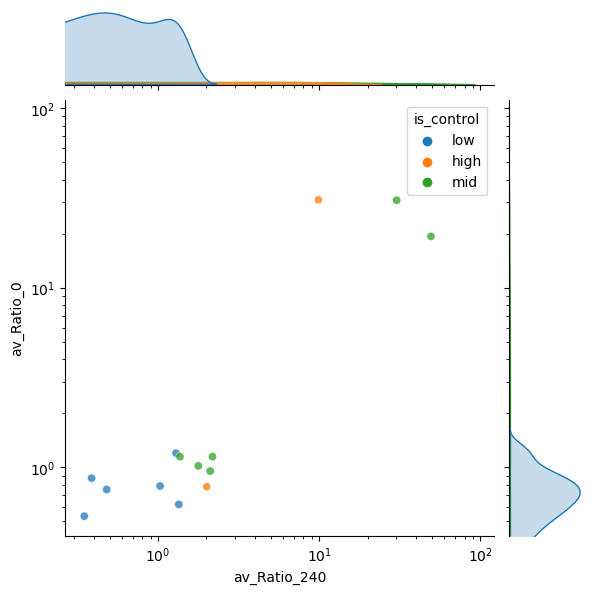

In [22]:
p = sns.jointplot(intersection4_240v0[intersection4_240v0['is_control']!='experimental'], 
                  x='av_Ratio_240', y='av_Ratio_0', 
                  joint_kws={'alpha': 0.75}, hue='is_control')
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

In [64]:
# concatenate experimental dataframes
sample2 = []
sample3 = []
sample4 = []
for key in merged_dfs.keys():
    if key.startswith('AD_2'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample2.append(merged_dfs[key])
    if key.startswith('AD_3'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample3.append(merged_dfs[key])
    if key.startswith('AD_4'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample4.append(merged_dfs[key])  
        
exp2 = pd.concat(sample2, ignore_index=True)
exp3 = pd.concat(sample3, ignore_index=True)
exp4 = pd.concat(sample4, ignore_index=True)

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_3_0
AD_4_0
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_2_0
AD_4_240
AD_3_5


In [65]:
exp2

Tile   av_Ratio  Library
0      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...   0.204792  AD_2_30
1      AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...   1.343627  AD_2_30
2      AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...   3.755231  AD_2_30
3      AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...   0.078846  AD_2_30
4      AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...   0.289343  AD_2_30
...                                                  ...        ...      ...
14671  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...   0.796834   AD_2_0
14672  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  39.584927   AD_2_0
14673  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...   0.276079   AD_2_0
14674  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  23.419713   AD_2_0
14675  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...   0.866552   AD_2_0

[14676 rows x 3 columns]

In [66]:
exp2_collapsed = exp2.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-10)
exp2_collapsed

Library                                               Tile        AD_2_0  \
0        AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  8.290379e-01   
1        AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  1.051418e+00   
2        AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  3.851560e+00   
3        AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  3.882059e-01   
4        AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...  4.805262e-01   
...                                                    ...           ...   
3015     TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  3.958493e+01   
3016     TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...  2.760788e-01   
3017     TTTGTCTTGTTGTCTTTGTTTCCAAATGGTTTGTTGCCAGATGGTC...  1.000000e-10   
3018     TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  2.341971e+01   
3019     TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  8.665520e-01   

Library       AD_2_10      AD_2_180    AD_2_30        AD_2_5  
0        2.559898e-01  2.764242e-01   0.204792  6.399532e-01  
1        1.677380e+00  2.614412e+00   1.343627  2.134456e+00  
2        3.866712e+00  3.148173e+00   3.755231  3.265440e+00  
3        1.620503e-01  1.789721e-01   0.078846  2.589655e-01  
4        3.400416e-01  2.909983e-01   0.289343  3.775863e-01  
...               ...           ...        ...           ...  
3015     1.107460e+02  1.684100e+02  31.383390  1.336093e+02  
3016     3.794028e-01  5.149475e-01   0.197338  3.783273e-01  
3017     1.000000e-10  1.000000e-10   0.000281  1.000000e-10  
3018     1.841773e+01  1.102492e+01  20.488293  1.128236e+01  
3019     3.935583e-01  3.596333e-01   0.322620  4.641192e-01  

[3020 rows x 6 columns]

/tmp/ipykernel_7391/3332586522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp2_corr = exp2_collapsed.corr()


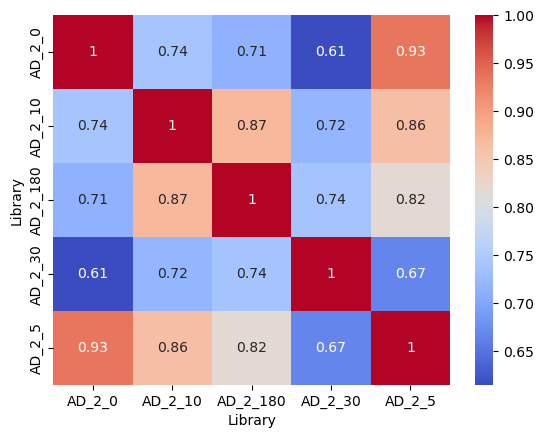

In [67]:
exp2_corr = exp2_collapsed.corr()
sns.heatmap(exp2_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/2543379795.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp2_corr = exp2_collapsed.corr(method='spearman')


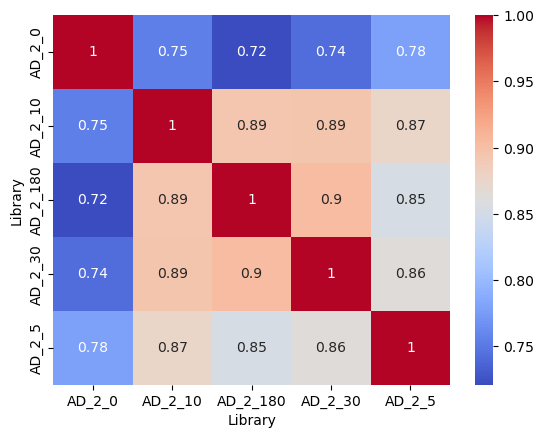

In [68]:
exp2_corr = exp2_collapsed.corr(method='spearman')
sns.heatmap(exp2_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/309553972.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp3_corr = exp3_collapsed.corr()


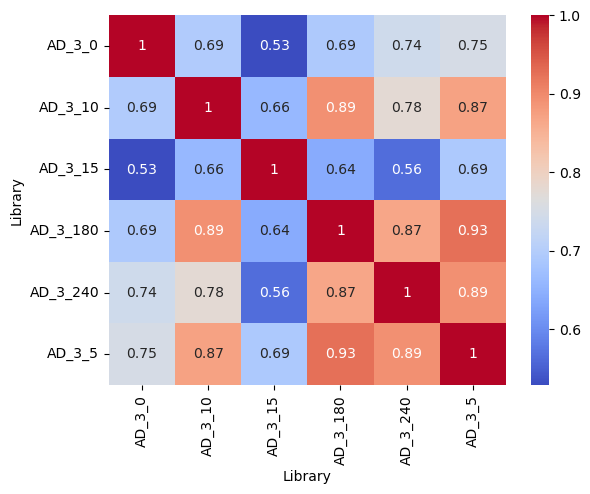

In [69]:
exp3_collapsed = exp3.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-10)

exp3_corr = exp3_collapsed.corr()
sns.heatmap(exp3_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/1483781301.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp3_corr = exp3_collapsed.corr(method='spearman')


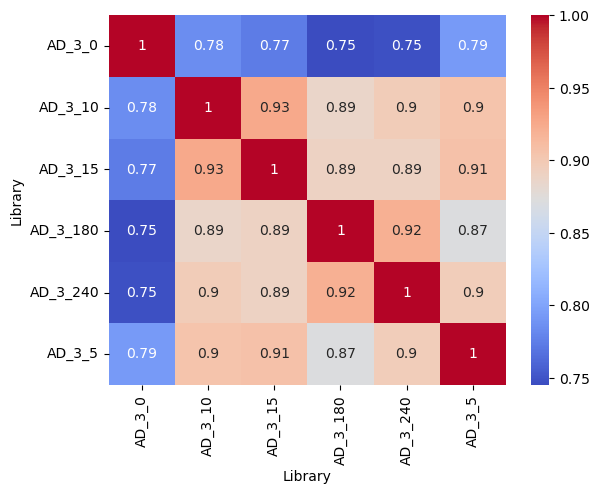

In [70]:
exp3_corr = exp3_collapsed.corr(method='spearman')
sns.heatmap(exp3_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/1080471037.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp4_corr = exp4_collapsed.corr()


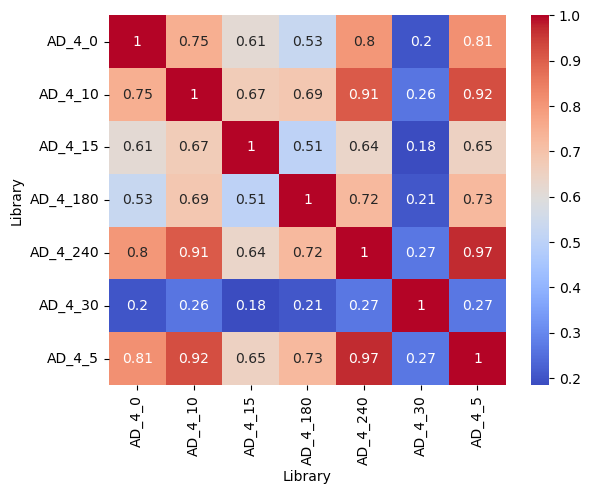

In [71]:
exp4_collapsed = exp4.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-10)

exp4_corr = exp4_collapsed.corr()
sns.heatmap(exp4_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_7391/3995599164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp4_corr = exp4_collapsed.corr(method='spearman')


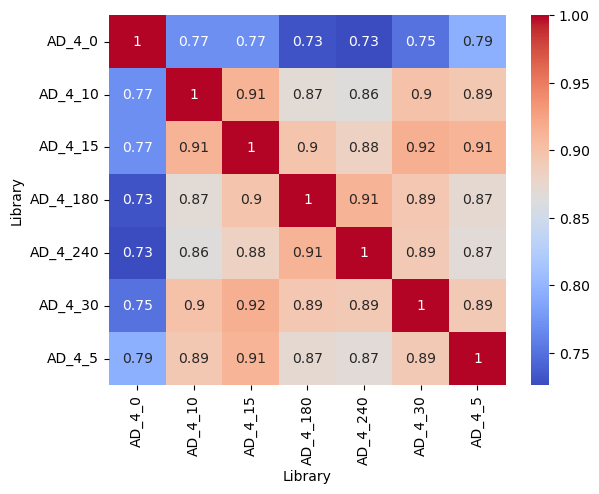

In [72]:
exp4_corr = exp4_collapsed.corr(method='spearman')
sns.heatmap(exp4_corr, annot=True, cmap='coolwarm')
plt.show()

In [7]:
t5 = []
t10 = []
t15 = []
t30 = []
t180 = []
t240 = []

for key in merged_dfs.keys():
    if key.endswith('_5'):
        print(key)
        merged_dfs[key]['Library'] = key
        t5.append(merged_dfs[key])
    if key.endswith('_10'):
        print(key)
        merged_dfs[key]['Library'] = key
        t10.append(merged_dfs[key])
    if key.endswith('_15'):
        print(key)
        merged_dfs[key]['Library'] = key
        t15.append(merged_dfs[key])  
    if key.endswith('_30'):
        print(key)
        merged_dfs[key]['Library'] = key
        t30.append(merged_dfs[key])
    if key.endswith('_180'):
        print(key)
        merged_dfs[key]['Library'] = key
        t180.append(merged_dfs[key])
    if key.endswith('_240'):
        print(key)
        merged_dfs[key]['Library'] = key
        t240.append(merged_dfs[key])      
        
        
t5_all = pd.concat(t5, ignore_index=True)
t10_all = pd.concat(t10, ignore_index=True)
t15_all = pd.concat(t15, ignore_index=True)
t30_all = pd.concat(t30, ignore_index=True)
t180_all = pd.concat(t180, ignore_index=True)
t240_all = pd.concat(t240, ignore_index=True)

t5_all

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_4_240
AD_3_5


Tile   av_Ratio Library
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...   0.639953  AD_2_5
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...   2.134456  AD_2_5
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...   3.265440  AD_2_5
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...   0.258966  AD_2_5
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...   0.377586  AD_2_5
...                                                 ...        ...     ...
8815  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...   1.074852  AD_3_5
8816  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  46.432649  AD_3_5
8817  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...   0.483129  AD_3_5
8818  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  18.106433  AD_3_5
8819  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...   0.487815  AD_3_5

[8820 rows x 3 columns]

In [45]:
t5_all_collapsed = t5_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)
t5_all_collapsed

Library                                               Tile      AD_2_5  \
0        AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.639953   
1        AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    2.134456   
2        AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    3.265440   
3        AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.258966   
4        AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.377586   
...                                                    ...         ...   
2992     TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...    0.656591   
2993     TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  133.609279   
2994     TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...    0.378327   
2995     TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...   11.282363   
2996     TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...    0.464119   

Library     AD_3_5     AD_4_5  
0         0.577796   0.365870  
1         2.355490   2.850883  
2         3.205113   3.176619  
3         0.202133   0.301449  
4         0.478914   0.445575  
...            ...        ...  
2992      1.074852   0.876453  
2993     46.432649   0.001000  
2994      0.483129   0.277413  
2995     18.106433  17.199762  
2996      0.487815   0.517374  

[2997 rows x 4 columns]

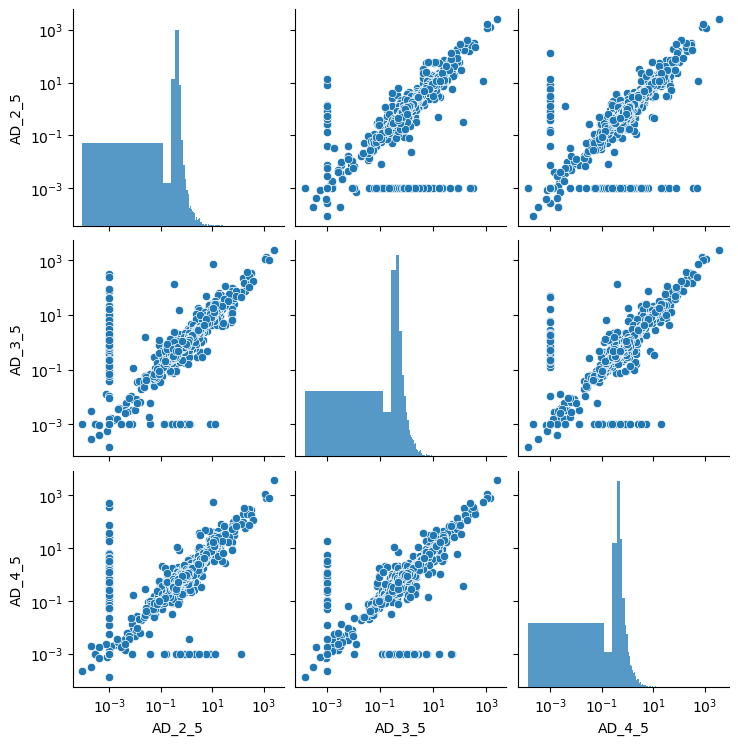

In [66]:
# t5_all_collapsed += 1e-2

p = sns.pairplot(t5_all_collapsed)
p.set(xscale="log", yscale="log")

plt.savefig('t5_pairplot_reproducibility.jpg', format='jpg')

In [49]:
t5_all_collapsed.corr(method='spearman')

/tmp/ipykernel_28554/2801375023.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  t5_all_collapsed.corr(method='spearman')


Library    AD_2_5    AD_3_5    AD_4_5
Library                              
AD_2_5   1.000000  0.866739  0.861605
AD_3_5   0.866739  1.000000  0.902169
AD_4_5   0.861605  0.902169  1.000000

In [53]:
spearmanr(t5_all_collapsed['AD_2_5'],t5_all_collapsed['AD_3_5'])

SignificanceResult(statistic=0.866738745312229, pvalue=0.0)

In [50]:
t5_all_collapsed.corr()

/tmp/ipykernel_28554/1954151896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  t5_all_collapsed.corr()


Library    AD_2_5    AD_3_5    AD_4_5
Library                              
AD_2_5   1.000000  0.947748  0.906543
AD_3_5   0.947748  1.000000  0.944624
AD_4_5   0.906543  0.944624  1.000000

In [54]:
pearsonr(t5_all_collapsed['AD_2_5'],t5_all_collapsed['AD_3_5'])

PearsonRResult(statistic=0.9477476592224714, pvalue=0.0)

In [46]:
# t5_all_collapsed.to_csv('t5ratios.csv')

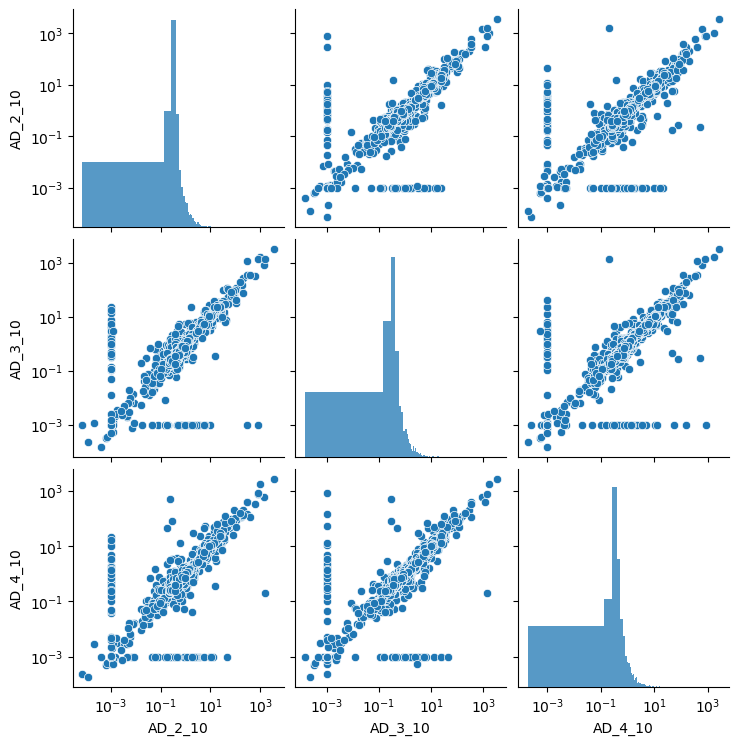

In [25]:
t10_all_collapsed = t10_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)

p = sns.pairplot(t10_all_collapsed)
p.set(xscale="log", yscale="log")
plt.show()

In [41]:
t10_all_collapsed = t10_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)
t10_all_collapsed.to_csv('t10ratios.csv')

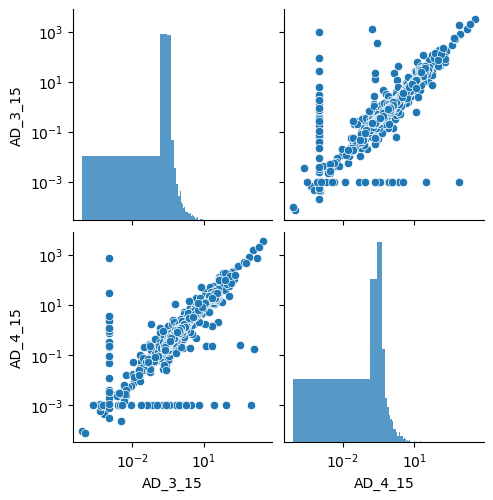

In [26]:
t15_all_collapsed = t15_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)

p = sns.pairplot(t15_all_collapsed)
p.set(xscale="log", yscale="log")
plt.show()

In [42]:
t15_all_collapsed = t15_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)
t15_all_collapsed.to_csv('t15ratios.csv')

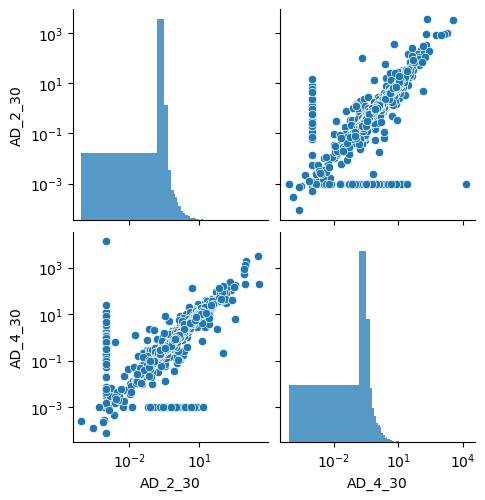

In [27]:
t30_all_collapsed = t30_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)

p = sns.pairplot(t30_all_collapsed)
p.set(xscale="log", yscale="log")
plt.show()

In [43]:
t30_all_collapsed = t30_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)
t30_all_collapsed.to_csv('t30ratios.csv')

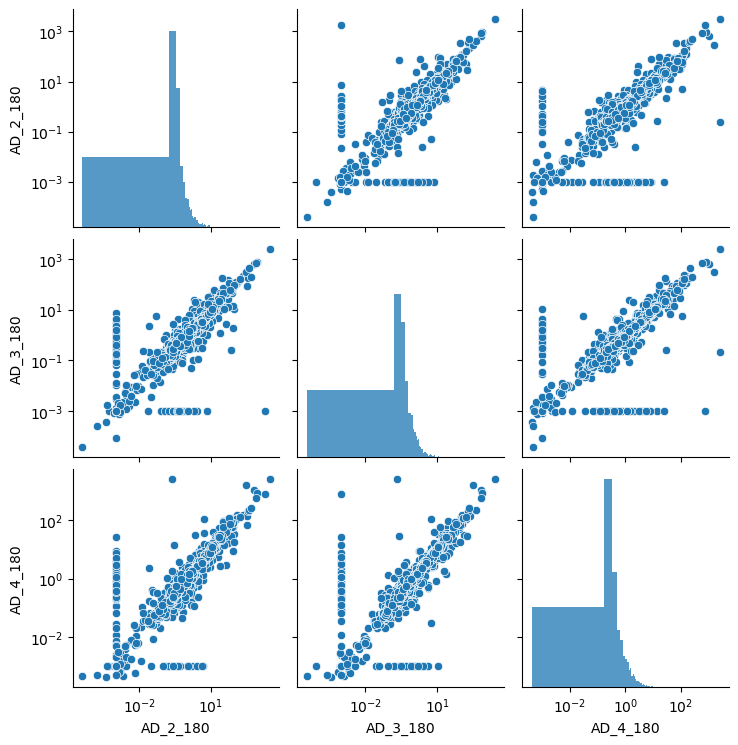

In [28]:
t180_all_collapsed = t180_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)

p = sns.pairplot(t180_all_collapsed)
p.set(xscale="log", yscale="log")
plt.show()

In [44]:
t180_all_collapsed = t180_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)
t180_all_collapsed.to_csv('t180ratios.csv')

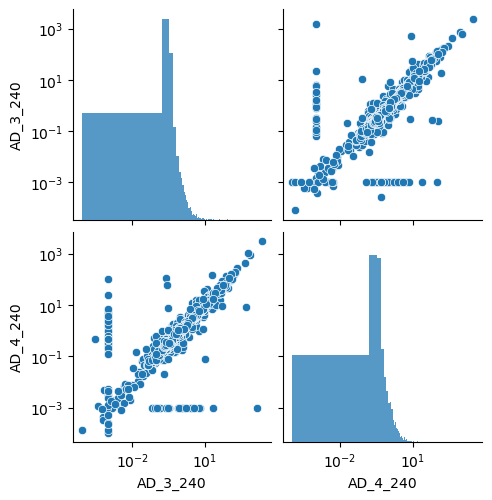

In [29]:
t240_all_collapsed = t240_all.pivot_table(index='Tile', columns='Library', values='av_Ratio').reset_index().fillna(1e-3)

p = sns.pairplot(t240_all_collapsed)
p.set(xscale="log", yscale="log")
plt.show()

In [30]:
t240_all_collapsed.head() #AD_2_240 didn't amplify

Library                                               Tile  AD_3_240  AD_4_240
0        AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.210555  0.321582
1        AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  1.887052  2.548102
2        AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  2.828135  2.475357
3        AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  0.142991  0.179716
4        AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...  0.346689  0.233850

In [31]:
# t240_all_collapsed.to_csv('t240ratios.csv')

Try a newer (than below) way to normalize by zero

Max doesn't want me to average according to sample. I'm leaving this code here just in case it becomes useful someday.

In [15]:
# concatenate experimental dataframes
sample2 = []
sample3 = []
sample4 = []
for key in merged_dfs.keys():
    if key.startswith('AD_2') and not key.endswith('_0'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample2.append(merged_dfs[key])
    if key.startswith('AD_3') and not key.endswith('_0'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample3.append(merged_dfs[key])
    if key.startswith('AD_4') and not key.endswith('_0'):
        print(key)
        merged_dfs[key]['Library'] = key
        sample4.append(merged_dfs[key])  
        
exp2 = pd.concat(sample2, ignore_index=True)
exp3 = pd.concat(sample3, ignore_index=True)
exp4 = pd.concat(sample4, ignore_index=True)

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_4_240
AD_3_5


In [16]:
exp2.head()

Tile  av_Ratio  Library
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.204792  AD_2_30
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  1.343627  AD_2_30
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  3.755231  AD_2_30
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  0.078846  AD_2_30
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...  0.289343  AD_2_30

In [11]:
# # take average activity for each tile using groupby
# exp2 = exp2.groupby('Tile')['av_Ratio'].mean().reset_index()
# exp3 = exp3.groupby('Tile')['av_Ratio'].mean().reset_index()
# exp4 = exp4.groupby('Tile')['av_Ratio'].mean().reset_index()

In [64]:
# for key in merged_dfs.keys():
#     print(key)
#     if key.startswith('AD_2') and not key.endswith('_0'):
#         testing = pd.merge(merged_dfs[key], exp2, on='Tile', how='left')
#         testing['Ratio_%diff'] = (testing['av_Ratio_x']-testing['av_Ratio_y'])/testing['av_Ratio_x'] *100
#         print(testing.describe())
#     if key.startswith('AD_3') and not key.endswith('_0'):
#         testing = pd.merge(merged_dfs[key], exp3, on='Tile', how='left')
#         testing['Ratio_%diff'] = (testing['av_Ratio_x']-testing['av_Ratio_y'])/testing['av_Ratio_x'] *100
#         print(testing.describe())
#         sample3.append(merged_dfs[key])
#     if key.startswith('AD_4') and not key.endswith('_0'):
#         testing = pd.merge(merged_dfs[key], exp3, on='Tile', how='left')
#         testing['Ratio_%diff'] = (testing['av_Ratio_x']-testing['av_Ratio_y'])/testing['av_Ratio_x'] *100
#         print(testing.describe())

AD_3_180
        av_Ratio_x   av_Ratio_y    Ratio_%diff
count  2975.000000  2975.000000    2975.000000
mean      4.520122     5.432362    -110.774432
std      53.695684    62.155404    4717.911913
min       0.000037     0.000145 -255970.682120
25%       0.302630     0.329591     -18.702705
50%       0.559556     0.552668      -3.819618
75%       1.467129     1.420439       8.276770
max    2519.122148  2548.515824      79.455501
AD_2_30
        av_Ratio_x   av_Ratio_y    Ratio_%diff
count  2945.000000  2945.000000    2945.000000
mean      7.052516     6.247384    -114.485846
std     102.042105    77.145273    4619.748609
min       0.000087     0.000281 -249539.178565
25%       0.256271     0.328123     -29.528364
50%       0.439126     0.524114     -14.984277
75%       1.408691     1.417655       0.964602
max    3750.177233  3130.705176      72.916990
AD_3_10
        av_Ratio_x   av_Ratio_y   Ratio_%diff
count  2944.000000  2944.000000   2944.000000
mean      6.069286     5.321703    -3

In [25]:
# test2 = pd.merge(merged_dfs['AD_2_10'], exp2, on='Tile', how='left')
# test2['Ratio_%diff'] = (test2['av_Ratio_x']-test2['av_Ratio_y'])/test2['av_Ratio_x'] *100
# test2

Tile  av_Ratio_x  \
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.255990   
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    1.677380   
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    3.866712   
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.162050   
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.340042   
...                                                 ...         ...   
2939  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...    0.933268   
2940  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  110.745954   
2941  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...    0.379403   
2942  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...   18.417729   
2943  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...    0.393558   

      av_Ratio_y  Ratio_%diff  
0       0.344290   -34.493505  
1       1.942469   -15.803731  
2       3.508889     9.253944  
3       0.169709    -4.725888  
4       0.324492     4.572756  
...          ...          ...  
2939    0.775896    16.862501  
2940  111.037157    -0.262947  
2941    0.367504     3.136188  
2942   15.303326    16.909811  
2943    0.384983     2.178964  

[2944 rows x 4 columns]

In [20]:
# test2.describe()

av_Ratio_x   av_Ratio_y   Ratio_%diff
count  2944.000000  2944.000000   2944.000000
mean      6.133106     6.251602    -35.606507
std      82.953742    77.159265    945.749673
min       0.000071     0.000080 -48603.119473
25%       0.308841     0.327628    -13.500315
50%       0.489194     0.523992     -3.781309
75%       1.320415     1.417419      3.808076
max    3544.873764  3130.705176     74.989595

/global/home/users/empchase/.conda/envs/biopython/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Ratio_%diff', ylabel='Count'>

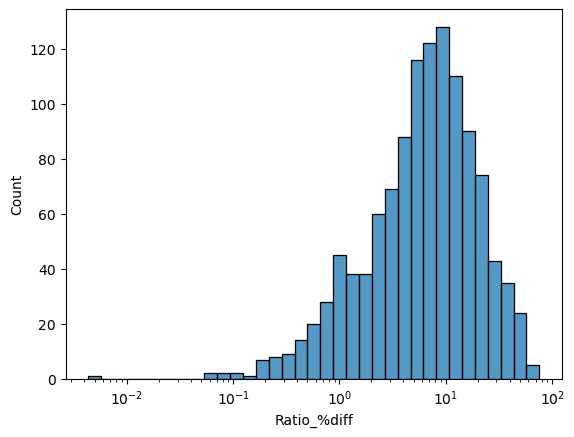

In [26]:
# # Add pseudocounts before log transformation
# test2['Ratio_%diff'] = test2['Ratio_%diff']+1

# sns.histplot(test2, x='Ratio_%diff', log_scale=True)

[None, None]

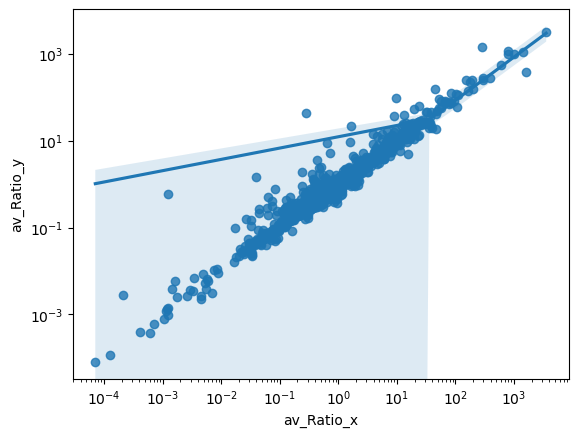

In [28]:
# p = sns.regplot(test2, x='av_Ratio_x', y='av_Ratio_y')
# p.set(xscale="log", yscale="log")

In [17]:
merged_dfs['AD_2_0']

Tile   av_Ratio
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...   0.829038
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...   1.051418
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...   3.851560
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...   0.388206
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...   0.480526
...                                                 ...        ...
2913  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...   0.796834
2914  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  39.584927
2915  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...   0.276079
2916  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  23.419713
2917  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...   0.866552

[2918 rows x 2 columns]

In [18]:
# inner merge with 0 control 
exp2_c = pd.merge(exp2, merged_dfs['AD_2_0'], on='Tile', how='left', suffixes=['_exp','_control'])
exp3_c = pd.merge(exp3, merged_dfs['AD_3_0'], on='Tile', how='left', suffixes=['_exp','_control'])
exp4_c = pd.merge(exp4, merged_dfs['AD_4_0'], on='Tile', how='left', suffixes=['_exp','_control'])
exp3_c.head()

Tile  av_Ratio_exp   Library  \
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...      0.144632  AD_3_180   
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...      1.665917  AD_3_180   
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...      2.404555  AD_3_180   
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...      0.221120  AD_3_180   
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...      0.293205  AD_3_180   

   av_Ratio_control  
0          0.726958  
1          1.163190  
2          3.022208  
3          0.436182  
4          0.989569

In [19]:
exp4_c.head()

Tile  av_Ratio_exp  Library  \
0  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...      0.590502  AD_4_15   
1  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...      2.340501  AD_4_15   
2  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...      3.890316  AD_4_15   
3  AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...      0.142827  AD_4_15   
4  AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...      0.329432  AD_4_15   

   av_Ratio_control  
0          0.494398  
1          1.447961  
2          3.535264  
3          0.319998  
4          0.832350

In [20]:
# divide av_Ratio column by control column
exp2_c['controlled_Ratio'] = exp2_c['av_Ratio_exp']/exp2_c['av_Ratio_control']
# exp2_c['Sample'] = 'Sample2'
exp3_c['controlled_Ratio'] = exp3_c['av_Ratio_exp']/exp3_c['av_Ratio_control']
# exp3_c['Sample'] = 'Sample3'
exp4_c['controlled_Ratio'] = exp4_c['av_Ratio_exp']/exp4_c['av_Ratio_control']
# exp4_c['Sample'] = 'Sample4'
exp4_c

Tile  av_Ratio_exp  \
0      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...      0.590502   
1      AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...      2.340501   
2      AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...      3.890316   
3      AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...      0.142827   
4      AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...      0.329432   
...                                                  ...           ...   
17814  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...      1.070927   
17815  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...    110.736868   
17816  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...      0.363392   
17817  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...     17.610107   
17818  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...      0.323330   

        Library  av_Ratio_control  controlled_Ratio  
0       AD_4_15          0.494398          1.194385  
1       AD_4_15          1.447961          1.616411  
2       AD_4_15          3.535264          1.100432  
3       AD_4_15          0.319998          0.446339  
4       AD_4_15          0.832350          0.395785  
...         ...               ...               ...  
17814  AD_4_240          0.941202          1.137830  
17815  AD_4_240        114.571099          0.966534  
17816  AD_4_240          0.159144          2.283424  
17817  AD_4_240          9.907945          1.777372  
17818  AD_4_240          1.026993          0.314831  

[17819 rows x 5 columns]

In [32]:
#now that it's all normalized, concatenate based on time point


t5_c2 = exp2_c[exp2_c['Library'].str.endswith('_5')]
t5_c3 = exp3_c[exp3_c['Library'].str.endswith('_5')]
t5_c4 = exp4_c[exp4_c['Library'].str.endswith('_5')]
t5all_c = pd.concat([t5_c2, t5_c3, t5_c4], 
                    ignore_index=True).pivot_table(index='Tile', columns='Library', values='controlled_Ratio', 
                                                   ).reset_index().fillna(1e-3)

t5all_c

Library                                               Tile    AD_2_5  \
0        AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.771923   
1        AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  2.030073   
2        AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.847823   
3        AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  0.667083   
4        AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...  0.785777   
...                                                    ...       ...   
2940     TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...  0.824000   
2941     TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  3.375256   
2942     TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...  1.370360   
2943     TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  0.481746   
2944     TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  0.535593   

Library    AD_3_5    AD_4_5  
0        0.794814  0.740031  
1        2.025026  1.968895  
2        1.060520  0.898552  
3        0.463413  0.942035  
4        0.483963  0.535322  
...           ...       ...  
2940     1.227112  0.931206  
2941     0.659374  0.001000  
2942     0.828364  1.743162  
2943     0.718683  1.735957  
2944     0.462475  0.503776  

[2945 rows x 4 columns]

In [34]:
# t240_c2 = exp2_c[exp2_c['Library'].str.endswith('_240')] #there is no 2_240
t240_c3 = exp3_c[exp3_c['Library'].str.endswith('_240')]
t240_c4 = exp4_c[exp4_c['Library'].str.endswith('_240')]
t240all_c = pd.concat([t240_c3, t240_c4], 
                    ignore_index=True).pivot_table(index='Tile', columns='Library', values='controlled_Ratio', 
                                                   ).reset_index().fillna(1e-3)

t240all_c

Library                                               Tile  AD_3_240  AD_4_240
0        AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.289639  0.650451
1        AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...  1.622308  1.759786
2        AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.935784  0.700190
3        AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...  0.327824  0.561616
4        AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...  0.350344  0.280951
...                                                    ...       ...       ...
2951     TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...  0.899103  1.137830
2952     TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  1.513550  0.966534
2953     TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...  0.440164  2.283424
2954     TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...  0.353739  1.777372
2955     TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  0.305615  0.314831

[2956 rows x 3 columns]

In [35]:
# t240all_c.to_csv('t240_normalized.csv')

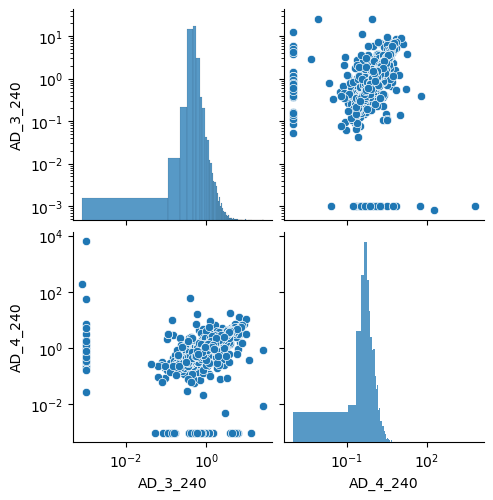

In [36]:
p = sns.pairplot(t240all_c)
p.set(xscale="log", yscale="log")
plt.show()

In [46]:
allexperiments = pd.concat([exp2_c, exp3_c, exp4_c], ignore_index=True)
allexperiments

Tile  av_Ratio_x  \
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.344290   
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    1.942469   
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    3.508889   
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.169709   
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.324492   
...                                                 ...         ...   
8788  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...    0.879775   
8789  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...   67.661665   
8790  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...    0.298835   
8791  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...   22.133025   
8792  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...    0.416353   

      av_Ratio_y  controlled_Ratio   Sample  
0       0.829038          0.415288  Sample2  
1       1.051418          1.847475  Sample2  
2       3.851560          0.911031  Sample2  
3       0.388206          0.437161  Sample2  
4       0.480526          0.675285  Sample2  
...          ...               ...      ...  
8788    0.941202          0.934736  Sample4  
8789  114.571099          0.590565  Sample4  
8790    0.159144          1.877766  Sample4  
8791    9.907945          2.233866  Sample4  
8792    1.026993          0.405410  Sample4  

[8793 rows x 5 columns]

<Axes: xlabel='controlled_Ratio', ylabel='Count'>

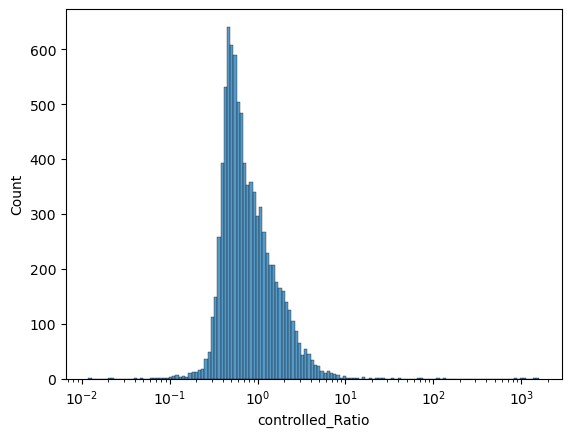

In [48]:
sns.histplot(allexperiments, x='controlled_Ratio', log_scale=True)

In [47]:
# allexperiments.to_csv('all_experiments_controlled.csv')

In [40]:
allexperiments_mean = allexperiments.groupby('Tile')['controlled_Ratio'].mean().reset_index()
allexperiments_mean = allexperiments_mean.rename(columns={'controlled_Ratio':'av_controlled_Ratio'})
allexperiments_mean

Tile  av_controlled_Ratio
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...             0.528282
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...             1.701483
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...             0.951084
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...             0.471061
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...             0.469274
...                                                 ...                  ...
2975  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...             0.951469
2976  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...             1.577512
2977  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...             1.243842
2978  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...             1.139413
2979  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...             0.411119

[2980 rows x 2 columns]

In [41]:
# allexperiments_mean.to_csv('all_experiments_controlled_averaged.csv')

<Axes: xlabel='av_controlled_Ratio', ylabel='Count'>

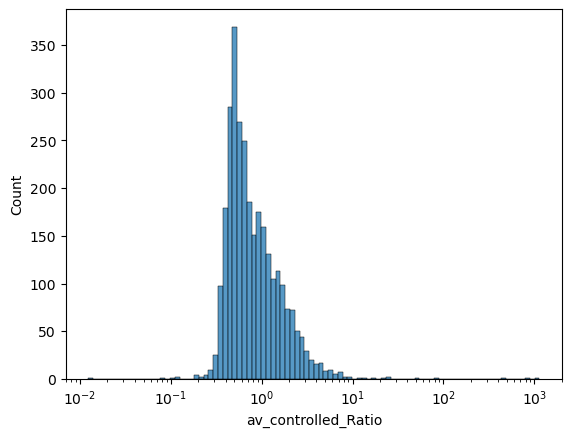

In [43]:
sns.histplot(data=allexperiments_mean, x='av_controlled_Ratio', log_scale=True)

In [55]:
# scatter matrix - requires columns Tile, Ratio_Exp2, Ratio_Exp3, Ratio_Exp4

# merge dfs

compare_exp = pd.merge(pd.merge(exp2_c, exp3_c, on='Tile', suffixes=['_2', '_3']), exp4_c, on='Tile')
col_todrop = ['Tile','av_Ratio_x_2', 'av_Ratio_y_2', 'Sample_2', 'av_Ratio_x_3', 'av_Ratio_y_3', 'Sample_3', 'av_Ratio_x', 'av_Ratio_y', 'Sample' ]
compare_exp = compare_exp.drop(columns=col_todrop)
compare_exp = compare_exp.rename(columns={'controlled_Ratio':'controlled_Ratio_4'})
compare_exp

controlled_Ratio_2  controlled_Ratio_3  controlled_Ratio_4
0               0.415288            0.451836            0.717722
1               1.847475            1.708005            1.548969
2               0.911031            1.018992            0.923230
3               0.437161            0.432400            0.543622
4               0.675285            0.359140            0.373395
...                  ...                 ...                 ...
2877            0.973723            0.945947            0.934736
2878            2.805036            1.336934            0.590565
2879            1.331156            0.522602            1.877766
2880            0.653438            0.530935            2.233866
2881            0.444270            0.383677            0.405410

[2882 rows x 3 columns]

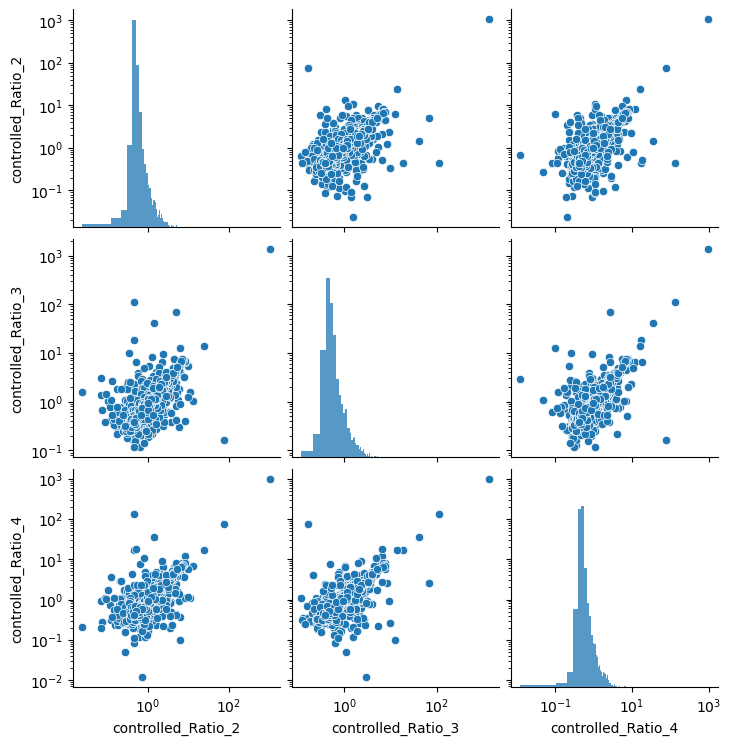

In [57]:
p = sns.pairplot(compare_exp)
p.set(xscale="log", yscale="log")
plt.show()

In [56]:
# what difference does averaging make in original dfs?

merged_dfstest = {}
merged_dfsav = {}

for key in ADexperiments_dict.keys():
#     print(key)
    # Extracting the corresponding AD and RPTR dataframes
    ad_df = ADexperiments_dict[key]
    ad_df_size = ad_df.shape[0]
    print(f'{key} has {ad_df_size} AD entries')
    rptr_df = RPTRexperiments_dict[key.replace("AD", "RPTR")]
    rptr_df_size = rptr_df.shape[0]
    print(f'{key} has {rptr_df_size} RPTR entries')

    # Merging the dataframes
    merged_df = pd.merge(rptr_df, ad_df, left_on='index', right_on='PutativeRPTR', how='inner')
    merged_df_size = merged_df.shape[0]
    print(f'{key} has {merged_df_size} merged entries')
    print('%RPTRloss:', (1-merged_df_size/rptr_df_size) * 100)
    print('%ADloss:', (1-merged_df_size/ad_df_size) *100)
    merged_df = merged_df.drop(['PutativeTileADBC', 'Library_x','PutativeRPTR'], axis=1)
    merged_df['R_normalized'] = merged_df['BCs'] / merged_df['Allreads_x'] #create a column that normalizes for read depth
    merged_df['A_normalized'] = merged_df['Tile-AD'] / merged_df['Allreads_y'] #create a column that normalizes for read depth
    merged_df['Ratio'] = merged_df['R_normalized'] / merged_df['A_normalized'] 
    
    # for tiles represented by 2 RPTR BCs, take average of activity
    merged_df[['Tile', 'AD']] = merged_df['index_y'].str.split('-', expand=True) 
    merged_df_av = merged_df.groupby('Tile')['Ratio'].mean(numeric_only=False).reset_index() #get means of ratios
    merged_df_av = merged_df_av.rename(columns={'Ratio':'av_Ratio'})
    
    # calculate difference between average and non-average
    tester = pd.merge(merged_df,merged_df_av, on='Tile', how='left')
    tester['Ratio_%diff'] = (tester['Ratio']-tester['av_Ratio'])/tester['Ratio'] *100
    print(tester.describe()['Ratio_%diff'])
    # Storing the merged dataframe in a dictionary
    merged_dfstest[key] = merged_df
    merged_dfsav[key] = merged_df_av


AD_3_180 has 4004 AD entries
AD_3_180 has 3368 RPTR entries
AD_3_180 has 3257 merged entries
%RPTRloss: 3.295724465558192
%ADloss: 18.656343656343655
count      3257.000000
mean       -158.385396
std        3335.768347
min     -118700.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          65.787610
Name: Ratio_%diff, dtype: float64
AD_2_30 has 3973 AD entries
AD_2_30 has 3335 RPTR entries
AD_2_30 has 3221 merged entries
%RPTRloss: 3.418290854572714
%ADloss: 18.927762396174174
count     3221.000000
mean      -118.631313
std       2433.852315
min     -94240.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         66.494969
Name: Ratio_%diff, dtype: float64
AD_3_10 has 3982 AD entries
AD_3_10 has 3353 RPTR entries
AD_3_10 has 3222 merged entries
%RPTRloss: 3.9069490008947216
%ADloss: 19.08588648920141
count      3222.000000
mean       -475.142621
std       15743.346411
min     -788400.000000
25%           0.000000
50%          

In [46]:
merged_dfstest['AD_2_10']

index_x     BCs  Allreads_x  \
0     GCTTCTCCGCACAT  475012    35648049   
1     GTCCAGTTTAGTGA  326303    35648049   
2     TAGGAATTAGATCT  292076    35648049   
3     TGGGCCGGAATTGC  281239    35648049   
4     TCAGCATCCAACAC  235717    35648049   
...              ...     ...         ...   
3211  TCAAGAGTATTTCG       1    35648049   
3212  TAGAGGTCACTGAC       1    35648049   
3213  CCGCCAAACCATAT       1    35648049   
3214  CTATAATAAACTCC       1    35648049   
3215  CAAGACAAGGCCGC       1    35648049   

                                                index_y  Tile-AD Library_y  \
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...    30130   AD_2_10   
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...    35449   AD_2_10   
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...    13776   AD_2_10   
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...    37614   AD_2_10   
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...      551   AD_2_10   
...                                                 ...      ...       ...   
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...       34   AD_2_10   
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...       14   AD_2_10   
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...        5   AD_2_10   
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...     4211   AD_2_10   
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...    12685   AD_2_10   

      Allreads_y  R_normalized  A_normalized       Ratio  \
0       32027127  1.332505e-02  9.407650e-04   14.164057   
1       32027127  9.153460e-03  1.106843e-03    8.269882   
2       32027127  8.193324e-03  4.301354e-04   19.048244   
3       32027127  7.889324e-03  1.174442e-03    6.717509   
4       32027127  6.612339e-03  1.720417e-05  384.345254   
...          ...           ...           ...         ...   
3211    32027127  2.805203e-08  1.061600e-06    0.026424   
3212    32027127  2.805203e-08  4.371294e-07    0.064173   
3213    32027127  2.805203e-08  1.561177e-07    0.179685   
3214    32027127  2.805203e-08  1.314823e-04    0.000213   
3215    32027127  2.805203e-08  3.960705e-04    0.000071   

                                                   Tile           AD  
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...  TAACATCTATC  
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...  AGTGCAGAGAC  
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...  TTACTGCTGTG  
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...  ATATACCGCAC  
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...  GGGCGCAGTTC  
...                                                 ...          ...  
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...  TACCCATGCTA  
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...  GGAGGCAGTAT  
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...  ACAAACCAAAG  
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...  TGGAGACTCTC  
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...  CTCTACTACCT  

[3216 rows x 12 columns]

In [47]:
merged_dfsav['AD_2_10']

Tile    av_Ratio
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...    0.255990
1     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...    1.677380
2     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...    3.866712
3     AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...    0.162050
4     AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...    0.340042
...                                                 ...         ...
2939  TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...    0.933268
2940  TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...  110.745954
2941  TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...    0.379403
2942  TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...   18.417729
2943  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...    0.393558

[2944 rows x 2 columns]

In [57]:
# test2_10 = pd.merge(merged_dfstest['AD_2_10'],merged_dfsav['AD_2_10'], on=['index_x', 'BCs', 'Allreads_x','index_y','Tile-AD','Library_y', 'Allreads_y', 'R_normalized', 'A_normalized', 'Tile', 'AD'])
test2_10 = pd.merge(merged_dfstest['AD_2_10'],merged_dfsav['AD_2_10'], on='Tile', how='left')
test2_10

index_x     BCs  Allreads_x  \
0     GCTTCTCCGCACAT  475012    35648049   
1     GTCCAGTTTAGTGA  326303    35648049   
2     TAGGAATTAGATCT  292076    35648049   
3     TGGGCCGGAATTGC  281239    35648049   
4     TCAGCATCCAACAC  235717    35648049   
...              ...     ...         ...   
3211  TCAAGAGTATTTCG       1    35648049   
3212  TAGAGGTCACTGAC       1    35648049   
3213  CCGCCAAACCATAT       1    35648049   
3214  CTATAATAAACTCC       1    35648049   
3215  CAAGACAAGGCCGC       1    35648049   

                                                index_y  Tile-AD Library_y  \
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...    30130   AD_2_10   
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...    35449   AD_2_10   
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...    13776   AD_2_10   
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...    37614   AD_2_10   
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...      551   AD_2_10   
...                                                 ...      ...       ...   
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...       34   AD_2_10   
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...       14   AD_2_10   
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...        5   AD_2_10   
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...     4211   AD_2_10   
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...    12685   AD_2_10   

      Allreads_y  R_normalized  A_normalized       Ratio  \
0       32027127  1.332505e-02  9.407650e-04   14.164057   
1       32027127  9.153460e-03  1.106843e-03    8.269882   
2       32027127  8.193324e-03  4.301354e-04   19.048244   
3       32027127  7.889324e-03  1.174442e-03    6.717509   
4       32027127  6.612339e-03  1.720417e-05  384.345254   
...          ...           ...           ...         ...   
3211    32027127  2.805203e-08  1.061600e-06    0.026424   
3212    32027127  2.805203e-08  4.371294e-07    0.064173   
3213    32027127  2.805203e-08  1.561177e-07    0.179685   
3214    32027127  2.805203e-08  1.314823e-04    0.000213   
3215    32027127  2.805203e-08  3.960705e-04    0.000071   

                                                   Tile           AD  \
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...  TAACATCTATC   
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...  AGTGCAGAGAC   
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...  TTACTGCTGTG   
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...  ATATACCGCAC   
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...  GGGCGCAGTTC   
...                                                 ...          ...   
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...  TACCCATGCTA   
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...  GGAGGCAGTAT   
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...  ACAAACCAAAG   
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...  TGGAGACTCTC   
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...  CTCTACTACCT   

        av_Ratio  
0      14.164057  
1       8.269882  
2      19.048244  
3       6.717509  
4     198.419389  
...          ...  
3211    0.026424  
3212    0.064173  
3213    0.179685  
3214    0.000213  
3215    0.000071  

[3216 rows x 13 columns]

In [58]:
test2_10['Ratio_%diff'] = abs(test2_10['Ratio']-test2_10['av_Ratio'])/test2_10['Ratio'] *100
test2_10

index_x     BCs  Allreads_x  \
0     GCTTCTCCGCACAT  475012    35648049   
1     GTCCAGTTTAGTGA  326303    35648049   
2     TAGGAATTAGATCT  292076    35648049   
3     TGGGCCGGAATTGC  281239    35648049   
4     TCAGCATCCAACAC  235717    35648049   
...              ...     ...         ...   
3211  TCAAGAGTATTTCG       1    35648049   
3212  TAGAGGTCACTGAC       1    35648049   
3213  CCGCCAAACCATAT       1    35648049   
3214  CTATAATAAACTCC       1    35648049   
3215  CAAGACAAGGCCGC       1    35648049   

                                                index_y  Tile-AD Library_y  \
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...    30130   AD_2_10   
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...    35449   AD_2_10   
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...    13776   AD_2_10   
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...    37614   AD_2_10   
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...      551   AD_2_10   
...                                                 ...      ...       ...   
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...       34   AD_2_10   
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...       14   AD_2_10   
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...        5   AD_2_10   
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...     4211   AD_2_10   
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...    12685   AD_2_10   

      Allreads_y  R_normalized  A_normalized       Ratio  \
0       32027127  1.332505e-02  9.407650e-04   14.164057   
1       32027127  9.153460e-03  1.106843e-03    8.269882   
2       32027127  8.193324e-03  4.301354e-04   19.048244   
3       32027127  7.889324e-03  1.174442e-03    6.717509   
4       32027127  6.612339e-03  1.720417e-05  384.345254   
...          ...           ...           ...         ...   
3211    32027127  2.805203e-08  1.061600e-06    0.026424   
3212    32027127  2.805203e-08  4.371294e-07    0.064173   
3213    32027127  2.805203e-08  1.561177e-07    0.179685   
3214    32027127  2.805203e-08  1.314823e-04    0.000213   
3215    32027127  2.805203e-08  3.960705e-04    0.000071   

                                                   Tile           AD  \
0     ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...  TAACATCTATC   
1     ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...  AGTGCAGAGAC   
2     GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...  TTACTGCTGTG   
3     GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...  ATATACCGCAC   
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...  GGGCGCAGTTC   
...                                                 ...          ...   
3211  ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATTGC...  TACCCATGCTA   
3212  ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTG...  GGAGGCAGTAT   
3213  CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTATGT...  ACAAACCAAAG   
3214  CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTCTC...  TGGAGACTCTC   
3215  AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGTTG...  CTCTACTACCT   

        av_Ratio  Ratio_%diff  
0      14.164057       0.0000  
1       8.269882       0.0000  
2      19.048244       0.0000  
3       6.717509       0.0000  
4     198.419389      48.3747  
...          ...          ...  
3211    0.026424       0.0000  
3212    0.064173       0.0000  
3213    0.179685       0.0000  
3214    0.000213       0.0000  
3215    0.000071       0.0000  

[3216 rows x 14 columns]

In [59]:
test2_10.describe()

BCs  Allreads_x        Tile-AD  Allreads_y  R_normalized  \
count    3216.000000      3216.0    3216.000000      3216.0  3.216000e+03   
mean     7213.446206  35648049.0    5499.314988  32027127.0  2.023518e-04   
std     22254.695730         0.0    8898.804483         0.0  6.242893e-04   
min         1.000000  35648049.0       1.000000  32027127.0  2.805203e-08   
25%       399.750000  35648049.0     606.500000  32027127.0  1.121380e-05   
50%      1487.000000  35648049.0    2326.000000  32027127.0  4.171336e-05   
75%      5016.000000  35648049.0    6599.000000  32027127.0  1.407090e-04   
max    475012.000000  35648049.0  151244.000000  32027127.0  1.332505e-02   

       A_normalized        Ratio     av_Ratio    Ratio_%diff  
count  3.216000e+03  3216.000000  3216.000000    3216.000000  
mean   1.717080e-04     6.539254     6.539254     370.757570  
std    2.778521e-04    93.558660    84.342564   15334.423807  
min    3.122353e-08     0.000071     0.000071       0.000000  
25%    1.893707e-05     0.307785     0.311974       0.000000  
50%    7.262593e-05     0.482786     0.501025       0.000000  
75%    2.060441e-04     1.320415     1.353027       0.000000  
max    4.722372e-03  3544.873764  3544.873764  859950.000000

<Axes: xlabel='Ratio_%diff', ylabel='Count'>

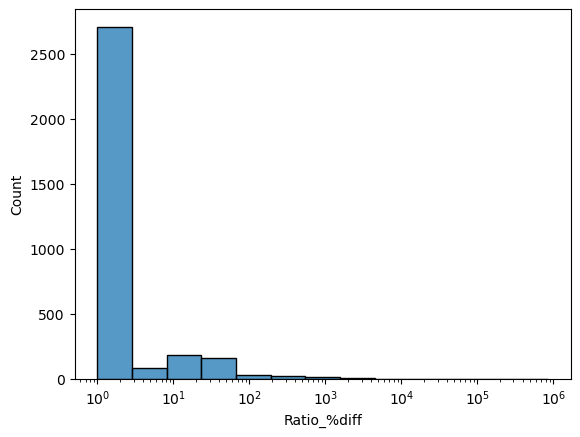

In [60]:
test2_10['Ratio_%diff'] = test2_10['Ratio_%diff']+1
sns.histplot(test2_10, x='Ratio_%diff', log_scale=True)

[None, None]

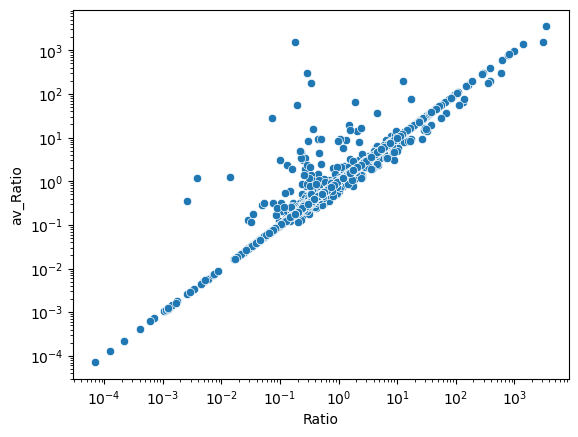

In [65]:
p =sns.scatterplot(test2_10, x='Ratio', y='av_Ratio')
p.set(xscale="log", yscale="log")

In [62]:
test2_10[test2_10['Ratio_%diff']>10]

index_x     BCs  Allreads_x  \
4     TCAGCATCCAACAC  235717    35648049   
15    AGTGAGTGGTAACA  160278    35648049   
16    ACCCGTCATGACCC  157875    35648049   
22    GCAGCCAGCTACCA  125497    35648049   
60    GGAGGGGTCAGAAG   71173    35648049   
...              ...     ...         ...   
3159  TATTTATAAACCAA       8    35648049   
3166  TCACCAATCAAAAA       7    35648049   
3169  TGGATGTAGTTTAT       7    35648049   
3199  ACATTGGAGCATAG       2    35648049   
3200  TCATAAAACGCGCA       2    35648049   

                                                index_y  Tile-AD Library_y  \
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...      551   AD_2_10   
15    AATCCAGTTGATTTGCCAGATTTGTTTGACTTCTCTACTGATCAAT...    17961   AD_2_10   
16    AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...    11353   AD_2_10   
22    TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...     9973   AD_2_10   
60    TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATTGT...    61749   AD_2_10   
...                                                 ...      ...       ...   
3159  TTGGGTTTGACTCCAACTATTATGGGTCATGCTGGTTATGTCTTGA...        2   AD_2_10   
3166  TTGCAACAGAAACATAGATTGGCTCAAATTCAAGCTTCTGGTTCTC...       85   AD_2_10   
3169  TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATTGT...       42   AD_2_10   
3199  GCTTTGTCTGGTGATCCATGGTATCCATTGTTTCCACAAGAAGATC...      696   AD_2_10   
3200  TCTTTGTCTACTGCTACTATTCCATCTCAAGAATTTAATTTGTTTA...       15   AD_2_10   

      Allreads_y  R_normalized  A_normalized       Ratio  \
4       32027127  6.612339e-03  1.720417e-05  384.345254   
15      32027127  4.496123e-03  5.608058e-04    8.017254   
16      32027127  4.428714e-03  3.544808e-04   12.493524   
22      32027127  3.520445e-03  3.113923e-04   11.305499   
60      32027127  1.996547e-03  1.928022e-03    1.035542   
...          ...           ...           ...         ...   
3159    32027127  2.244162e-07  6.244706e-08    3.593703   
3166    32027127  1.963642e-07  2.654000e-06    0.073988   
3169    32027127  1.963642e-07  1.311388e-06    0.149738   
3199    32027127  5.610405e-08  2.173158e-05    0.002582   
3200    32027127  5.610405e-08  4.683530e-07    0.119790   

                                                   Tile           AD  \
4     AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...  GGGCGCAGTTC   
15    AATCCAGTTGATTTGCCAGATTTGTTTGACTTCTCTACTGATCAAT...  CCCACCCCCGT   
16    AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...  TCCGTGTCTGC   
22    TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...  CCATGGGCGAC   
60    TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATTGT...  CGCGGCTACAA   
...                                                 ...          ...   
3159  TTGGGTTTGACTCCAACTATTATGGGTCATGCTGGTTATGTCTTGA...  GAAGAGGTCGA   
3166  TTGCAACAGAAACATAGATTGGCTCAAATTCAAGCTTCTGGTTCTC...  TCATACACATC   
3169  TCTTCTTCATTTGGTTTGTCTGGTAATTCTTCTCAACATAGATTGT...  TTCTCCTTCCT   
3199  GCTTTGTCTGGTGATCCATGGTATCCATTGTTTCCACAAGAAGATC...  TGTTCTAACAG   
3200  TCTTTGTCTACTGCTACTATTCCATCTCAAGAATTTAATTTGTTTA...  GCAGTTATTTA   

        av_Ratio   Ratio_%diff  
4     198.419389     49.374700  
15      7.119159     12.202027  
16    198.419389   1489.177962  
22      8.893019     22.338995  
60      0.592640     43.770081  
...          ...           ...  
3159    1.929174     47.317933  
3166   28.168952  37973.321429  
3169    0.592640    296.785357  
3199    0.347195  13349.398169  
3200    0.536204    348.619451  

[401 rows x 14 columns]

In [58]:
test2_10[test2_10['index_y'].str.startswith('TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGGTACTG')]

index_x    BCs  Allreads_x  \
92    CCAGATAAAACTTG  47740    35648049   
2322  ATGTTTCAATTTGT    464    35648049   

                                                index_y  Tile-AD Library_y  \
92    TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGGTACTG...     1491   AD_2_10   
2322  TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGGTACTG...      263   AD_2_10   

      Allreads_y  R_normalized  A_normalized      Ratio  \
92      32027127      0.001339      0.000047  28.766497   
2322    32027127      0.000013      0.000008   1.585055   

                                                   Tile           AD  \
92    TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGGTACTG...  TTGCTTACCAC   
2322  TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGGTACTG...  TTGACGCGTTG   

       av_Ratio  Ratio_%diff  
92    15.175776    48.244963  
2322  15.175776  -856.428768